## Programming Environment and Libraries

All analyses in this project were conducted using Python.
The following libraries were used for data collection, processing, analysis,
and visualization.

- **pandas**  
  Used for loading, cleaning, and restructuring tabular datasets, including
  e-commerce product data, social media advertising claims, and questionnaire
  responses stored in CSV format.

- **numpy**  
  Used for numerical operations and basic transformations, such as log-scale
  conversions in sales and review distribution analysis.

- **matplotlib**  
  Used to generate publication-style visualizations, including bar charts,
  scatter plots, and comparative figures used in the final analysis.

- **selenium**  
  Used in `taobao_scraper.ipynb` for automated data collection from the Taobao
  platform. The scraped data were subsequently exported as structured CSV files
  for analysis.

## Taobao Data Processing

In [1]:
import pandas as pd
import numpy as np
import re

# Load data
df = pd.read_csv(
    "../../dataset/taobao_eye_supplement_products.csv",
    encoding="utf-8-sig",   # Prevent Chinese characters from being garbled
    low_memory=False       # Prevent incorrect data type inference
)

In [2]:
# Check whether there are any encoding issues in the data
df.head()

,Num,Category,Detail_Title,Sold_Count,Add_To_Cart,Repeat_Customers,Comment_Count,Good_Rate,Title_URL
0,1,叶黄素,DLOVE【诺奖得主研发】水溶性叶黄素虾青素亮眼护眼猫去泪痕狗GJ DLOVE【诺奖得主研发...,2000+,超300人加购,NaN,NaN,100.0%,https://click.simba.taobao.com/cc_im?p=%D2%B6%...
1,2,叶黄素,德国双心高端护眼宝胶囊越橘蓝莓鱼油护眼叶黄素成人护眼丸omega3 德国双心高端护眼宝胶囊越...,2万+,超2万人加购,超3千回头客,4000+,98.4%,https://click.simba.taobao.com/cc_im?p=%D2%B6%...
2,3,叶黄素,Youthit优思益蓝莓叶黄素护眼丸成人越橘胶囊花青素进口保健品 Youthit优思益蓝莓叶...,10万+,超7万人加购,超1万回头客,1万+,98.1%,https://click.simba.taobao.com/cc_im?p=%D2%B6%...
3,4,叶黄素,Swisse叶黄素成人护眼片保护眼睛保健品官方正品旗舰店蓝莓越橘 Swisse叶黄素成人护眼...,1万+,超6千人加购,回头客533人,900+,98.7%,https://detail.tmall.com/item.htm?id=785150253...
4,5,叶黄素,汤臣倍健Yep花青素亮眼蓝莓叶黄素青少年成人呵护眼睛营养咀嚼片 汤臣倍健Yep花青素亮眼蓝莓...,4万+,超2万人加购,超3千回头客,NaN,98.1%,https://click.simba.taobao.com/cc_im?p=%D2%B6%...


In [3]:
# View column names
df.columns.tolist()

['Num',
 'Category',
 'Detail_Title',
 'Sold_Count',
 'Add_To_Cart',
 'Repeat_Customers',
 'Comment_Count',
 'Good_Rate',
 'Title_URL']

In [4]:
def parse_taobao_number(x):
    """
    Convert Taobao-style numeric strings into float values
    """
    if pd.isna(x):
        return np.nan

    x = str(x)

    # Remove irrelevant text
    x = x.replace("人", "").replace("回头客", "").replace("加购", "")
    x = x.replace("超", "").replace("+", "").strip()

    # Percentage (e.g., positive review rate)
    if "%" in x:
        try:
            return float(x.replace("%", ""))
        except:
            return np.nan

    # Units: ten-thousand (万) / thousand (千)
    m = re.search(r"([\d\.]+)(万|千)?", x)
    if not m:
        return np.nan

    num = float(m.group(1))
    unit = m.group(2)

    if unit == "万":
        return num * 10000
    elif unit == "千":
        return num * 1000
    else:
        return num

In [5]:
df["Sold_Num"] = df["Sold_Count"].apply(parse_taobao_number)
df["Add_To_Cart_Num"] = df["Add_To_Cart"].apply(parse_taobao_number)
df["Repeat_Customers_Num"] = df["Repeat_Customers"].apply(parse_taobao_number)
df["Comment_Num"] = df["Comment_Count"].apply(parse_taobao_number)
df["Good_Rate_Num"] = df["Good_Rate"].apply(parse_taobao_number)

In [6]:
df[[
    "Sold_Count", "Sold_Num",
    "Add_To_Cart", "Add_To_Cart_Num",
    "Repeat_Customers", "Repeat_Customers_Num",
    "Comment_Count", "Comment_Num",
    "Good_Rate", "Good_Rate_Num"
]].head(15)

,Sold_Count,Sold_Num,Add_To_Cart,Add_To_Cart_Num,Repeat_Customers,Repeat_Customers_Num,Comment_Count,Comment_Num,Good_Rate,Good_Rate_Num
0,2000+,2000.0,超300人加购,300.0,NaN,NaN,NaN,NaN,100.0%,100.0
1,2万+,20000.0,超2万人加购,20000.0,超3千回头客,3000.0,4000+,4000.0,98.4%,98.4
2,10万+,100000.0,超7万人加购,70000.0,超1万回头客,10000.0,1万+,10000.0,98.1%,98.1
3,1万+,10000.0,超6千人加购,6000.0,回头客533人,533.0,900+,900.0,98.7%,98.7
4,4万+,40000.0,超2万人加购,20000.0,超3千回头客,3000.0,NaN,NaN,98.1%,98.1
5,2万+,20000.0,超9千人加购,9000.0,超1千回头客,1000.0,5000+,5000.0,98.6%,98.6
6,3万+,30000.0,超1万人加购,10000.0,超2千回头客,2000.0,6000+,6000.0,98.5%,98.5
7,9万+,90000.0,超2万人加购,20000.0,超8千回头客,8000.0,1万+,10000.0,99.1%,99.1
8,8000+,8000.0,超4千人加购,4000.0,回头客441人,441.0,1000+,1000.0,98.7%,98.7
9,3万+,30000.0,超7千人加购,7000.0,超2千回头客,2000.0,NaN,NaN,98.1%,98.1


In [7]:
# Quick sanity check after numeric conversion
df[["Sold_Num", "Comment_Num", "Repeat_Customers_Num"]].describe().round(1)

,Sold_Num,Comment_Num,Repeat_Customers_Num
count,300.0,193.0,186.0
mean,17205.1,2325.0,2119.0
std,43108.1,4450.3,3728.2
min,10.0,1.0,103.0
25%,800.0,100.0,320.0
50%,3500.0,600.0,901.0
75%,12500.0,3000.0,3000.0
max,500000.0,30000.0,30000.0


## Eye-health–related demand constitutes an essential market with full age-range and multi-population coverage.

In [8]:
# Display all product titles for manual inspection to identify real-world
# population-targeting terms used in item descriptions.
for i, title in enumerate(df["Detail_Title"].fillna("【空值】"), start=1):
    print(f"{i:03d} | {title}")

001 | DLOVE【诺奖得主研发】水溶性叶黄素虾青素亮眼护眼猫去泪痕狗GJ DLOVE【诺奖得主研发】水溶性叶黄素虾青素亮眼护眼猫去泪痕狗GJ
002 | 德国双心高端护眼宝胶囊越橘蓝莓鱼油护眼叶黄素成人护眼丸omega3 德国双心高端护眼宝胶囊越橘蓝莓鱼油护眼叶黄素成人护眼丸omega3
003 | Youthit优思益蓝莓叶黄素护眼丸成人越橘胶囊花青素进口保健品 Youthit优思益蓝莓叶黄素护眼丸成人越橘胶囊花青素进口保健品
004 | Swisse叶黄素成人护眼片保护眼睛保健品官方正品旗舰店蓝莓越橘 Swisse叶黄素成人护眼片保护眼睛保健品官方正品旗舰店蓝莓越橘
005 | 汤臣倍健Yep花青素亮眼蓝莓叶黄素青少年成人呵护眼睛营养咀嚼片 汤臣倍健Yep花青素亮眼蓝莓叶黄素青少年成人呵护眼睛营养咀嚼片
006 | 朴诺叶黄素成人护眼中老年专用保健品蓝莓胶囊朴诺官方正品旗舰店 朴诺叶黄素成人护眼中老年专用保健品蓝莓胶囊朴诺官方正品旗舰店
007 | 叶黄素护眼蓝莓美国进口高浓缩胶囊眼睛保健品成人中老年旗舰店 叶黄素护眼蓝莓美国进口高浓缩胶囊眼睛保健品成人中老年旗舰店
008 | 澳洲Youthit优思益蓝莓叶黄素护眼丸成人胶囊DHA新升级进口2瓶 澳洲Youthit优思益蓝莓叶黄素护眼丸成人胶囊DHA新升级进口2瓶
009 | 朴诺蓝莓素叶黄素成人护眼丸片眼睛保健品官方正品美国进口 朴诺蓝莓素叶黄素成人护眼丸片眼睛保健品官方正品美国进口
010 | 北京同仁堂朕皇官方正品叶黄素酯蓝莓越橘儿童学生成人中老年软糖 北京同仁堂朕皇官方正品叶黄素酯蓝莓越橘儿童学生成人中老年软糖
011 | 德国双心护眼叶黄素成人护眼丸胶囊45粒正品官方旗舰店 德国双心护眼叶黄素成人护眼丸胶囊45粒正品官方旗舰店
012 | 游离态叶黄素共晶进口高浓缩叶黄素成人护眼胶囊中老年视力眼疲劳 游离态叶黄素共晶进口高浓缩叶黄素成人护眼胶囊中老年视力眼疲劳
013 | Keophial越橘叶黄素胶囊儿童成人护眼睛专用正品官方旗舰店中老年 Keophial越橘叶黄素胶囊儿童成人护眼睛专用正品官方旗舰店中老年
014 | 仁和蓝莓叶黄素酯软糖片正品官方儿童青少年成人非进口护旗舰店眼 仁和蓝莓叶黄素酯软糖片正品官方儿童青少年成人非进口护旗舰店眼
015 | swisse叶黄素成人护眼片蓝莓花青素越

In [9]:
# Build rule-based keywords for identifying target audience references
# These keywords are extracted from manual inspection of product titles
# and are used to detect explicit or implicit “people-oriented” positioning
PEOPLE_KEYWORDS = [

    # ===== Age groups / Education stages =====
    "婴儿", "婴幼儿", "宝宝", "幼儿", "幼童",
    "儿童", "孩子",
    "少年", "青少年",
    "学生", "中学生", "高中生", "大学生",
    "成人", "成年人", "大人",
    "中老年", "老年", "老年人",

    # ===== Gender =====
    "男士", "女士", "男性", "女性",
    "男生", "女生",
    "男女", "男女可用", "男女通用",

    # ===== Physiological stages / Family roles =====
    "孕妇", "孕期", "哺乳期", "备孕", "孕前", "产后",

    # ===== Occupation / Identity (explicitly emphasized in analysis) =====
    "上班族", "白领", "职场", "职场人", "办公族",

    # ===== General or all-population expressions =====
    "全家", "全家人", "一家人",
    "人群", "人用",
    "适用", "专用", "可用",

    # ===== Scenario-based audience labels (observed in real titles) =====
    "备考", "熬夜党", "护眼党",

    # ===== Pets (explicitly present in the dataset) =====
    "猫", "狗", "猫咪", "狗狗", "宠物",
]


In [10]:
# Identify age-based target groups expressed using numeric patterns in product titles
PEOPLE_REGEX = [
    r"\d+\s*-\s*\d+\s*岁",        # Age ranges, e.g., 0–3 years, 6–12 years
    r"\d+\s*岁\s*\+?",            # Single age with optional plus sign, e.g., 3 years, 3+
    r"\d+\s*岁以上",              # Age and above, e.g., 18 years and above
    r"[一二三四五六七八九十]+岁",  # Age written in Chinese numerals, e.g., 三岁 (fallback coverage)
]

In [11]:
# Automatically identify target population references in product titles
# and return all matched population-related expressions
def extract_people_objects(title):
    if not isinstance(title, str) or not title.strip():
        return []

    hits = []

    # ① Keyword-based matching
    for kw in PEOPLE_KEYWORDS:
        if kw in title:
            hits.append(kw)

    # ② Regex-based matching (age expressions)
    for pat in PEOPLE_REGEX:
        for m in re.findall(pat, title):
            hits.append(m)

    # ③ Remove duplicates while preserving the original order
    seen = set()
    hits_unique = []
    for x in hits:
        if x not in seen:
            hits_unique.append(x)
            seen.add(x)

    return hits_unique


In [12]:
# Generate the people_objects column by extracting target audience indicators from product titles
df["people_objects"] = df["Detail_Title"].apply(extract_people_objects)

In [13]:
# Check whether people_objects is empty
empty_mask = df["people_objects"].apply(len).eq(0)

In [14]:
# Titles without explicit target audience references are not missing information;
# instead, sellers deliberately adopt a “de-targeting” strategy, positioning the
# product as a “general-purpose nutritional supplement”.
empty_titles = df.loc[empty_mask, "Detail_Title"]

print("Number of records with empty people_objects:", len(empty_titles))

print("\n=== All titles with empty people_objects (console output) ===\n")
print(empty_titles.to_string(index=False))

# Also save the results to a file
with open("people_objects_empty_titles.txt", "w", encoding="utf-8") as f:
    for t in empty_titles:
        f.write(str(t) + "\n")

print("\nSaved to people_objects_empty_titles.txt")


Number of records with empty people_objects: 61

=== All titles with empty people_objects (console output) ===

【自营】莱特维健明目叶黄素胶囊保护视力玉米黄质进口保健品60粒 【自营】莱特维健明目叶黄素胶囊...
Centrum善存海外Omega3+DHA玉米黄质护眼 鱼油叶黄素软胶囊50粒 Centrum...
SportsResearch叶黄素护眼缓解蓝光模糊保护万寿菊玉米黄质视力SR SportsRe...
葵花卫士叶黄素片 玉米黄质蓝莓叶黄素 蓝莓黑加仑叶黄素甄选原料 葵花卫士叶黄素片 玉米黄质蓝莓...
Jamieson健美生叶黄素20mg 软胶囊45粒呵护双眼玉米黄质1000mcg Jamies...
香港直发Doctor's best金达威叶黄素&amp;玉米黄质膳食180粒 香港直发Doct...
Jamieson健美生叶黄素呵护眼睛20mg玉米黄质45粒 Jamieson健美生叶黄素呵护眼...
美国Nurticost进口叶黄素&玉米黄质120粒明目护眼丸缓眼干涩疲劳 美国Nurticos...
【官方旗舰】HealthyCare越橘蓝莓叶黄素护眼60片*2瓶保健进口 【官方旗舰】Heal...
美国朴诺叶黄素软胶囊进口蓝莓护眼丸专利护眼保健品海外旗舰店 美国朴诺叶黄素软胶囊进口蓝莓护眼丸...
【自营】3瓶美国朴诺蓝莓叶黄素胶囊欧洲越橘高含量易60粒/瓶护眼 【自营】3瓶美国朴诺蓝莓叶黄...
Webber Naturals加拿大进口蓝莓高倍浓缩精华胶囊呵护双眼120粒 Webber N...
3瓶装40mg 美国朴诺叶黄素软胶囊进口蓝莓片护眼丸专利护眼保健品 3瓶装40mg 美国朴诺叶...
美国朴诺叶黄素 进口蓝莓片胶囊护眼丸专利护眼保健品海外旗舰店 美国朴诺叶黄素 进口蓝莓片胶囊护...
【立即抢购】FANCL蓝莓护眼亮眼精华花青素维生素越橘水润明眸 【立即抢购】FANCL蓝莓护眼...
3瓶装40mg 美国朴诺叶黄素软胶囊进口蓝莓片护眼丸专利护眼保健品 3瓶装40mg 美国朴诺叶...
金晨同款]汤臣倍健yep虾青素磁感小粉瓶7g鳕鱼胶原蛋白肽饮口服液 金晨同款]汤臣倍健yep虾...
金晨同款]汤臣倍健含虾青素鳕鱼胶原蛋白肽口

In [15]:
# Inspect all extracted people_objects to manually review the identified target groups
for i, title in enumerate(df["people_objects"].fillna("【空值】"), start=1):
    print(f"{i:03d} | {title}")

001 | ['猫', '狗']
002 | ['成人']
003 | ['成人']
004 | ['成人']
005 | ['少年', '青少年', '成人']
006 | ['成人', '中老年', '老年', '专用']
007 | ['成人', '中老年', '老年']
008 | ['成人']
009 | ['成人']
010 | ['儿童', '学生', '成人', '中老年', '老年']
011 | ['成人']
012 | ['成人', '中老年', '老年']
013 | ['儿童', '成人', '中老年', '老年', '专用']
014 | ['儿童', '少年', '青少年', '成人']
015 | ['成人']
016 | ['儿童', '成人', '中老年', '老年']
017 | ['儿童', '专用']
018 | ['学生', '成人']
019 | ['成人', '中老年', '老年']
020 | ['成人']
021 | ['成人', '中老年', '老年']
022 | ['成人']
023 | ['成人', '中老年', '老年']
024 | ['少年', '青少年', '成人']
025 | ['成人']
026 | ['儿童', '少年', '青少年', '成人']
027 | ['成人']
028 | ['少年', '青少年', '成人', '中老年', '老年']
029 | ['少年', '青少年', '成人', '中老年', '老年']
030 | ['儿童', '成人']
031 | ['成人']
032 | ['成人']
033 | ['儿童', '少年', '青少年']
034 | ['儿童', '少年', '青少年', '成人', '中老年', '老年']
035 | ['成人']
036 | ['儿童', '成人']
037 | ['儿童', '成人']
038 | ['成人']
039 | ['成人']
040 | ['儿童']
041 | ['少年', '青少年', '成人']
042 | ['少年', '青少年', '成人']
043 | ['儿童', '少年', '青少年', '成人']
044 | ['成人']
045 | ['成人']
046 | ['成人']
047 | ['成

In [16]:
# Mapping rules to normalize various people-related expressions
# into a unified set of target group categories
NORMALIZE_MAP = {
    # Age
    "婴儿": "Child", "宝宝": "Child", "幼儿": "Child", "婴幼儿": "Child",
    "0-3岁": "Child", "3岁": "Child",
    "儿童": "Child", "孩子": "Child",

    "少年": "Teen", "青少年": "Teen", "高中生": "Teen", "中学生": "Teen",

    "成人": "Adult", "成年人": "Adult", "大人": "Adult",

    "中老年": "Older Adult", "老年": "Older Adult", "老年人": "Older Adult",

    # Social role
    "学生": "Student", "备考": "Student",
    "上班族": "Working Adult", "白领": "Working Adult", "职场人": "Working Adult",

    # Gender
    "男士": "Male", "男性": "Male",
    "女士": "Female", "女性": "Female", "女生": "Female",
    "男女": "All Genders", "男女可用": "All Genders", "可用": "All Genders",

    # Physiological status
    "孕妇": "Pregnant", "孕期": "Pregnant",
    "备孕": "Pregnant", "孕前": "Pregnant", "哺乳期": "Pregnant",
}


In [17]:
def normalize_people_objects(raw_list):
    if not raw_list:
        return []

    normalized = set()
    for w in raw_list:
        if w in ["猫", "狗"]:
            continue  # Explicitly ignore pet-related terms
        std = NORMALIZE_MAP.get(w)
        if std:
            normalized.add(std)

    return list(normalized)

df["people_objects_normalized"] = df["people_objects"].apply(normalize_people_objects)


In [18]:
# Teen / Adult / Older Adult / Child: age-based categories
# Student / Pregnant / Male / Female / All Genders: role- or demographic-based categories
# Empty list indicates intentional "de-demographic" positioning,
# where the product is marketed as a universal or general-purpose supplement
for i, title in enumerate(df["people_objects_normalized"].fillna("【空值】"), start=1):
    print(f"{i:03d} | {title}")


001 | []
002 | ['Adult']
003 | ['Adult']
004 | ['Adult']
005 | ['Teen', 'Adult']
006 | ['Adult', 'Older Adult']
007 | ['Adult', 'Older Adult']
008 | ['Adult']
009 | ['Adult']
010 | ['Child', 'Student', 'Adult', 'Older Adult']
011 | ['Adult']
012 | ['Adult', 'Older Adult']
013 | ['Child', 'Adult', 'Older Adult']
014 | ['Child', 'Teen', 'Adult']
015 | ['Adult']
016 | ['Child', 'Adult', 'Older Adult']
017 | ['Child']
018 | ['Student', 'Adult']
019 | ['Adult', 'Older Adult']
020 | ['Adult']
021 | ['Adult', 'Older Adult']
022 | ['Adult']
023 | ['Adult', 'Older Adult']
024 | ['Teen', 'Adult']
025 | ['Adult']
026 | ['Child', 'Teen', 'Adult']
027 | ['Adult']
028 | ['Teen', 'Adult', 'Older Adult']
029 | ['Teen', 'Adult', 'Older Adult']
030 | ['Child', 'Adult']
031 | ['Adult']
032 | ['Adult']
033 | ['Child', 'Teen']
034 | ['Child', 'Teen', 'Adult', 'Older Adult']
035 | ['Adult']
036 | ['Child', 'Adult']
037 | ['Child', 'Adult']
038 | ['Adult']
039 | ['Adult']
040 | ['Child']
041 | ['Teen', 'Adul

In [19]:
from pathlib import Path
import matplotlib.pyplot as plt

def save_figure(
    filename,
    figures_dir_name="figures",
    dpi=300,
    transparent=False
):
    """
    Save the current matplotlib figure to the figures directory
    at the same level as the `code` folder.
    """

    # e.g. .../survey_analysis_eye_products_code/code/survey_analy...ducts_code
    project_root = Path.cwd().parents[1]
    figures_dir = project_root / figures_dir_name
    figures_dir.mkdir(exist_ok=True)

    output_path = figures_dir / filename

    plt.savefig(
        output_path,
        dpi=dpi,
        bbox_inches="tight",
        pad_inches=0,
        transparent=transparent
    )

    print(f"Figure saved to: {output_path}")


Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/audience_wordcloud.png


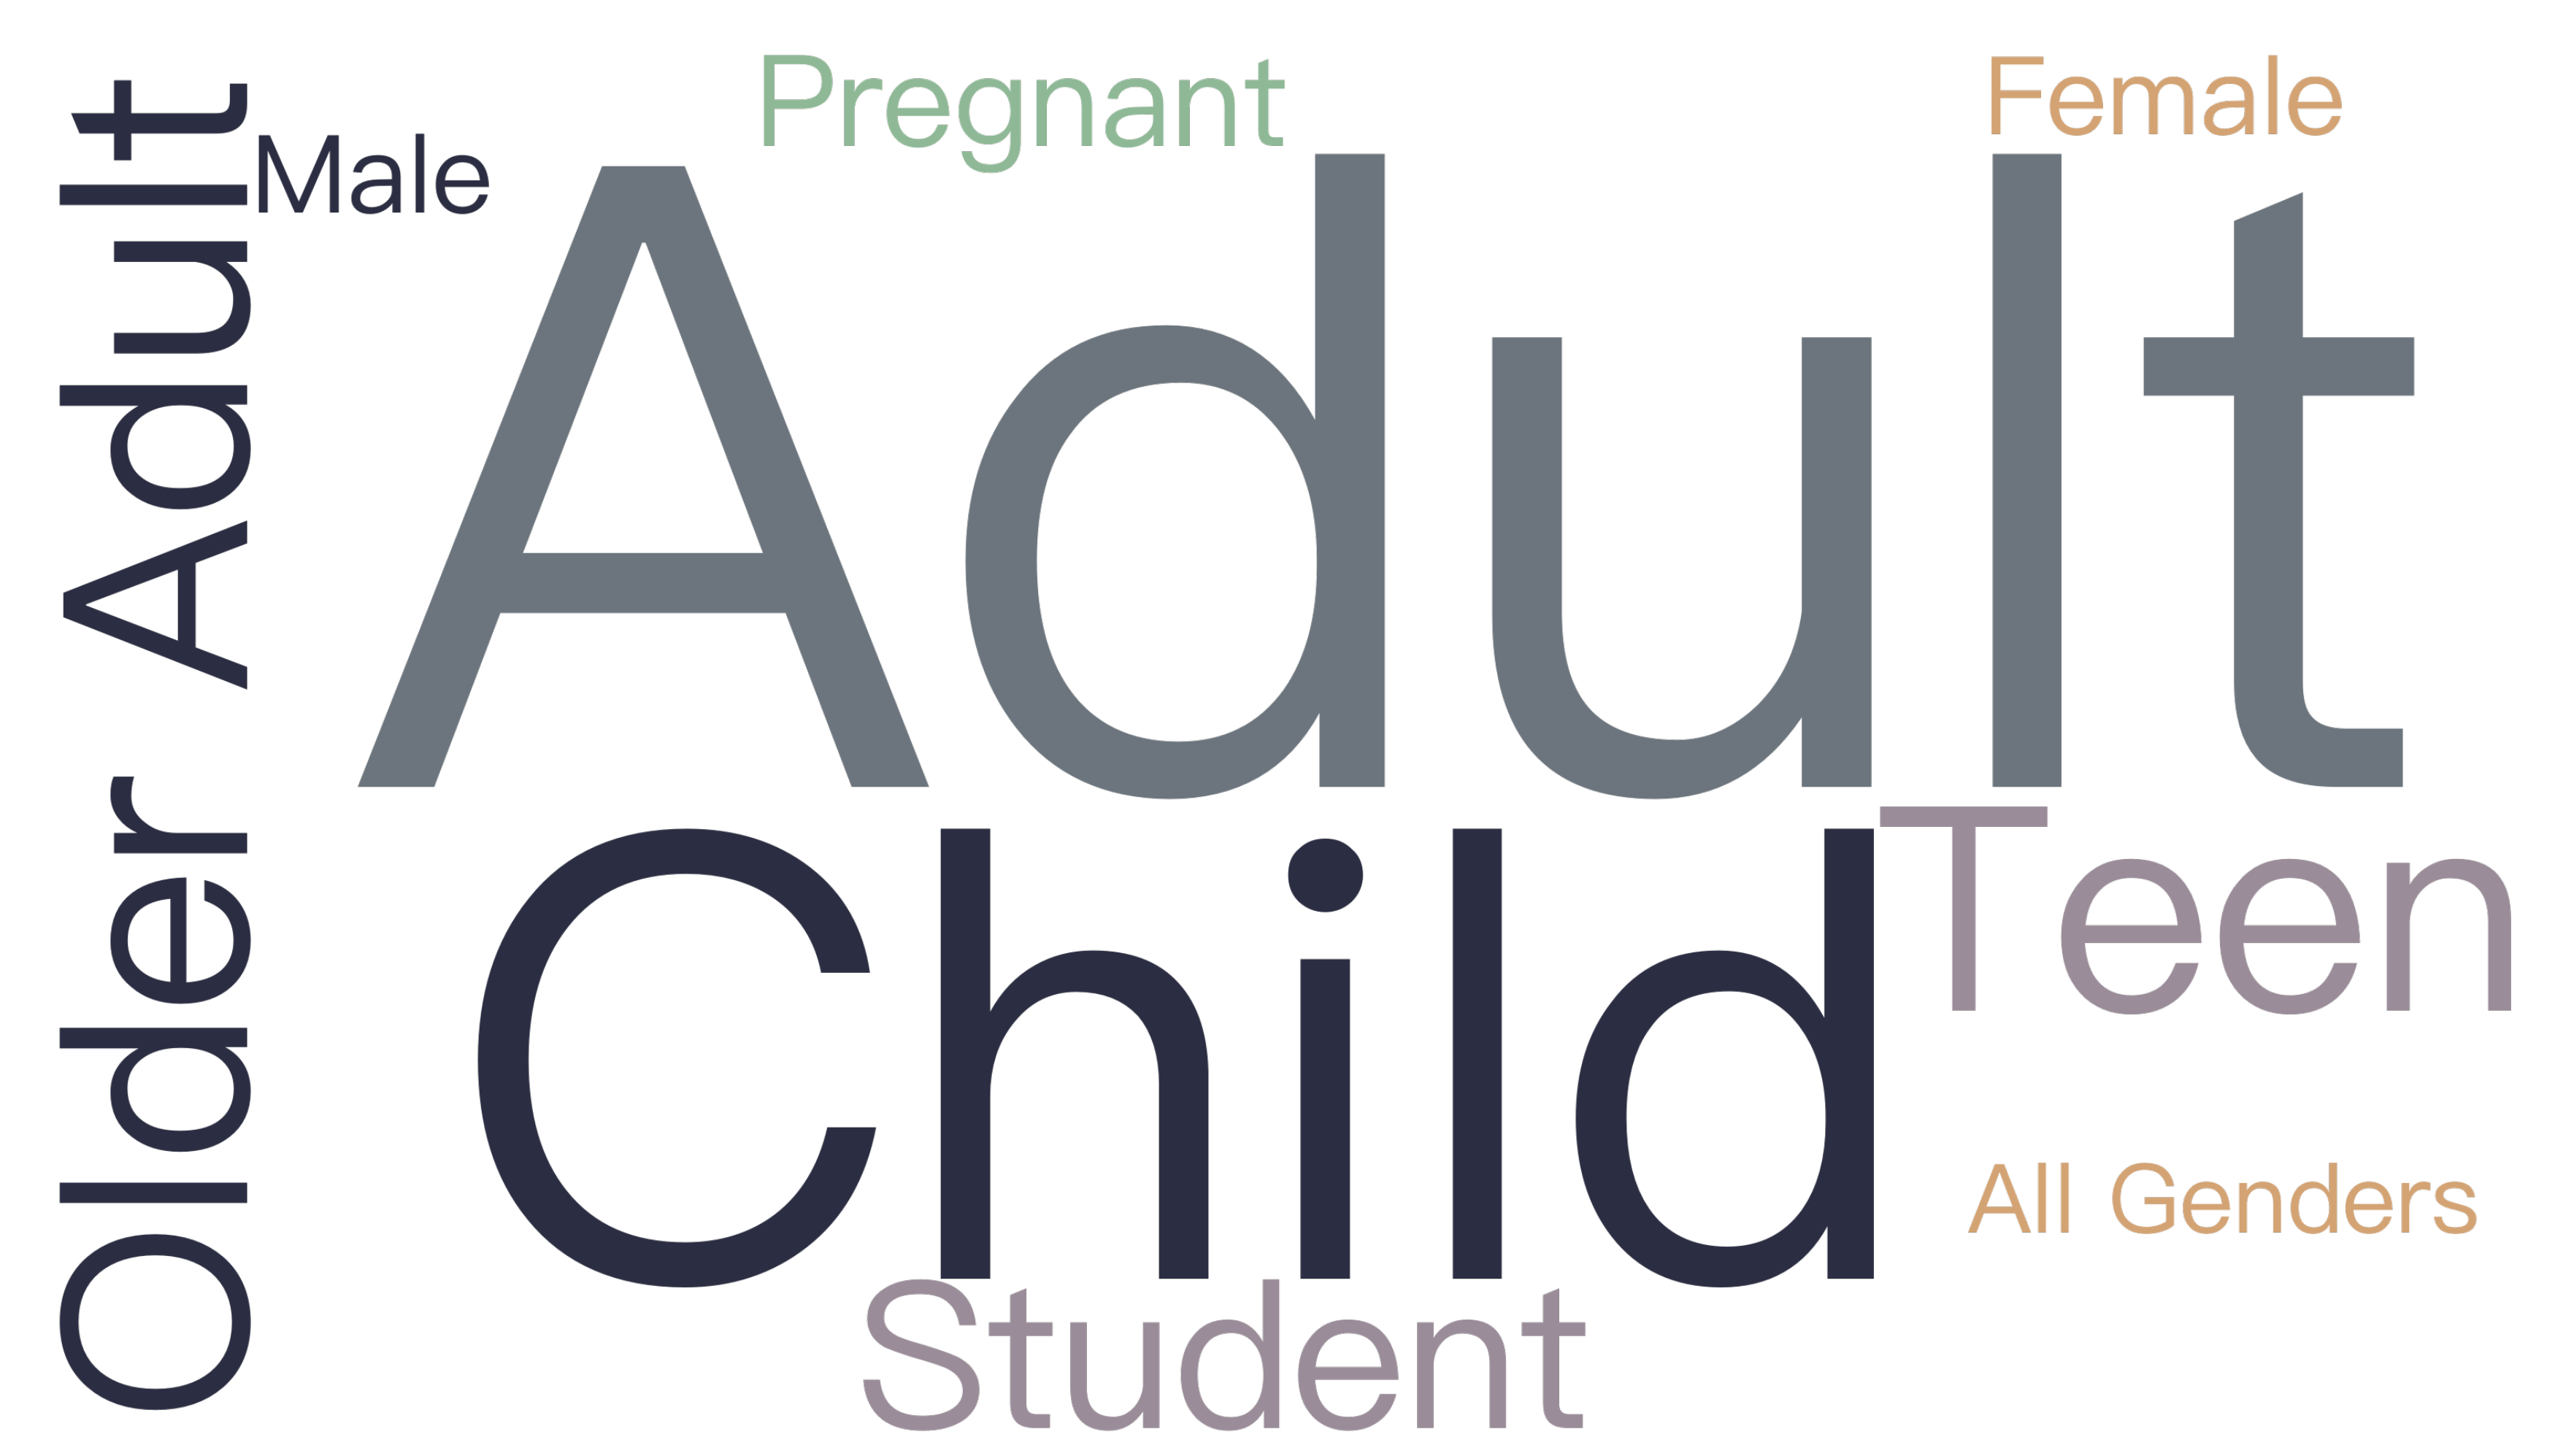

In [20]:
# Audience Word Cloud (Paper-level)

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random
import ast

# Data preparation

# Safely convert string-form lists in people_objects_normalized (if any)
def safe_eval(val):
    if isinstance(val, str) and val.strip().startswith('['):
        try:
            return ast.literal_eval(val)
        except Exception:
            return []
    if isinstance(val, list):
        return val
    return []

df["people_objects_normalized"] = (
    df["people_objects_normalized"]
    .fillna("[]")
    .apply(safe_eval)
)

# Flatten to one-dimensional series
all_audiences = (
    df["people_objects_normalized"]
    .explode()
    .dropna()
)

# Clean entries
all_audiences = all_audiences[all_audiences != ""]
all_audiences = all_audiences[all_audiences.astype(str).str.len() > 1]

# Compute word frequencies
audience_freq = Counter(all_audiences)


color_palette = [
    "#8FB996",
    "#6C757D",
    "#9A8C98",
    "#D4A373",
    "#2B2D42",
]

def academic_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(color_palette)

# Generate word cloud

wordcloud = WordCloud(
    width=1600,
    height=900,               # 16:9 aspect ratio
    background_color=None,    # Transparent background
    mode="RGBA",
    max_words=80,
    font_path="PingFang.ttc", # macOS; on Windows, use "msyh.ttc"
    prefer_horizontal=0.9,
    relative_scaling=0.45,
    scale=2,
    random_state=42
).generate_from_frequencies(audience_freq)

# Apply color palette
wordcloud.recolor(color_func=academic_color_func)

# Render and save

plt.figure(figsize=(12, 6.75), dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
save_figure("audience_wordcloud.png", transparent=True)
plt.show()

Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Market Coverage Across Age Groups for Eye-Health Products.png


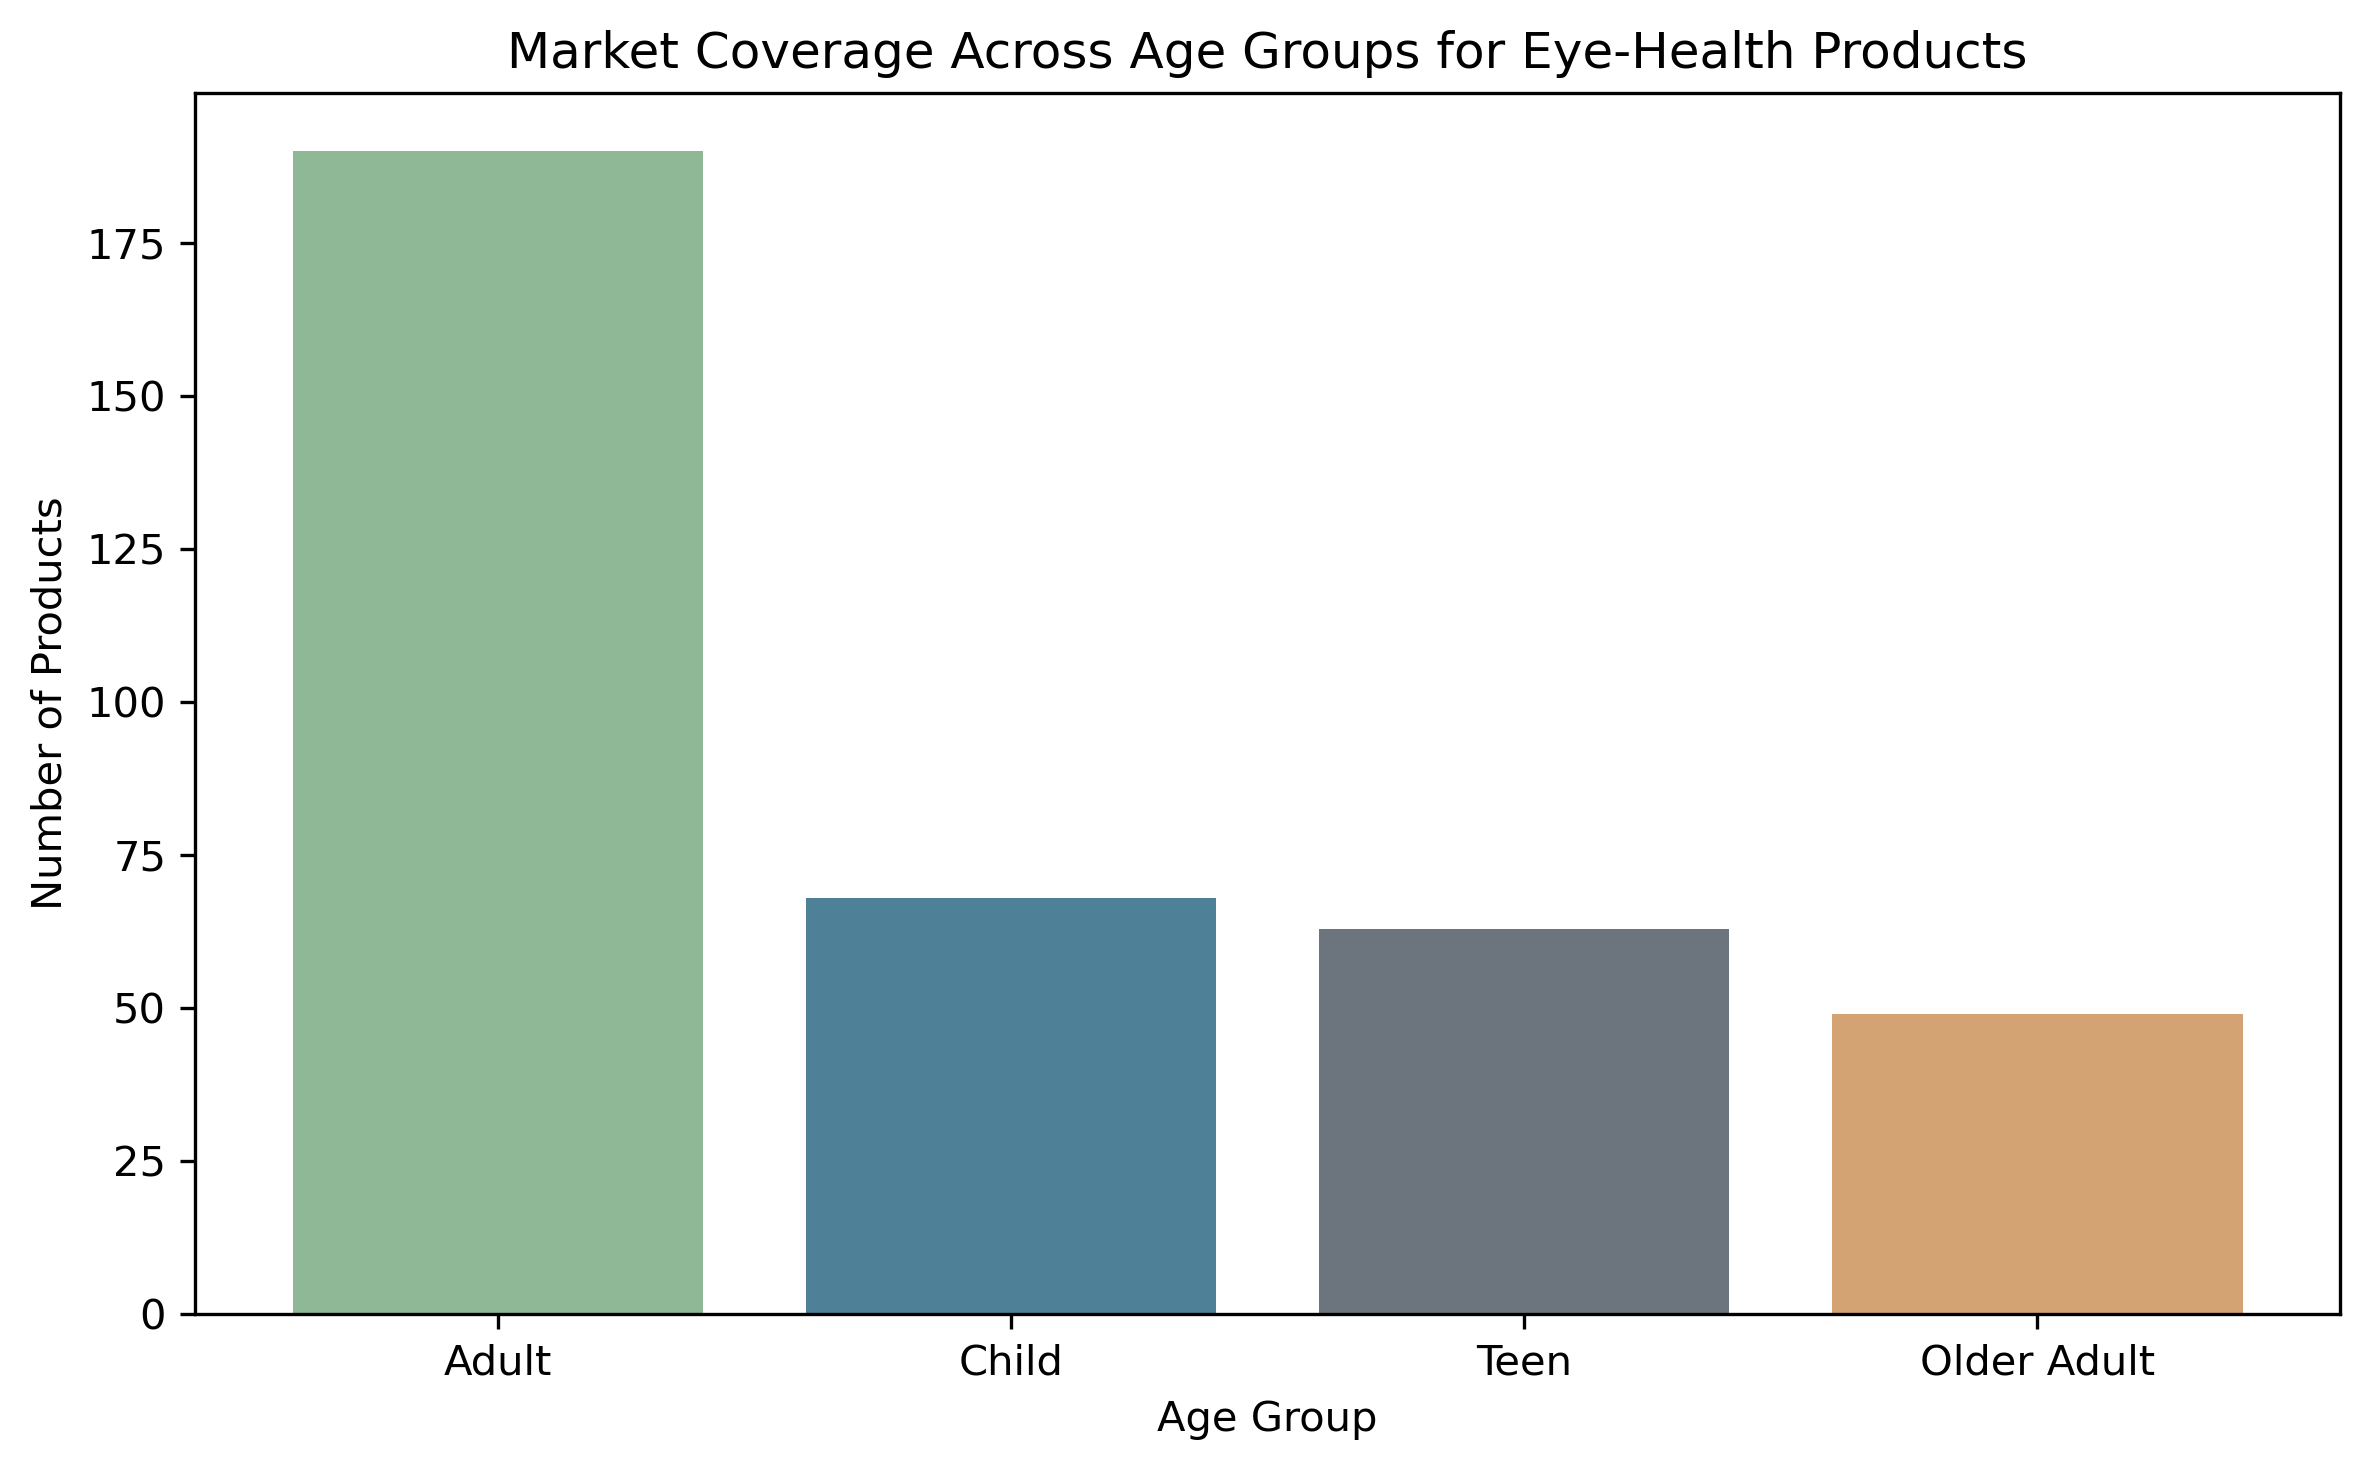

In [21]:
# Define age group categories
age_groups = ["Child", "Teen", "Adult", "Older Adult"]

# Explode the people_objects_normalized column
all_tags = (
    df["people_objects_normalized"]
    .explode()
    .dropna()
)

# Keep only age-related tags
age_tags = all_tags[all_tags.isin(age_groups)]

# Count frequency
age_freq = Counter(age_tags)

age_df = pd.DataFrame(
    age_freq.items(),
    columns=["Age Group", "Frequency"]
).sort_values("Frequency", ascending=False)

# Plot
plt.figure(figsize=(8, 5), dpi=300)

colors = [
    "#8FB996",   # Child
    "#4E8098",   # Teen
    "#6C757D",   # Adult
    "#D4A373",   # Older Adult
]

plt.bar(
    age_df["Age Group"],
    age_df["Frequency"],
    color=colors
)

plt.ylabel("Number of Products")
plt.xlabel("Age Group")
plt.title("Market Coverage Across Age Groups for Eye-Health Products")

plt.tight_layout()
save_figure("Market Coverage Across Age Groups for Eye-Health Products.png", transparent=True)
plt.show()


Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Target Audience Coverage of Eye-Health Products.png


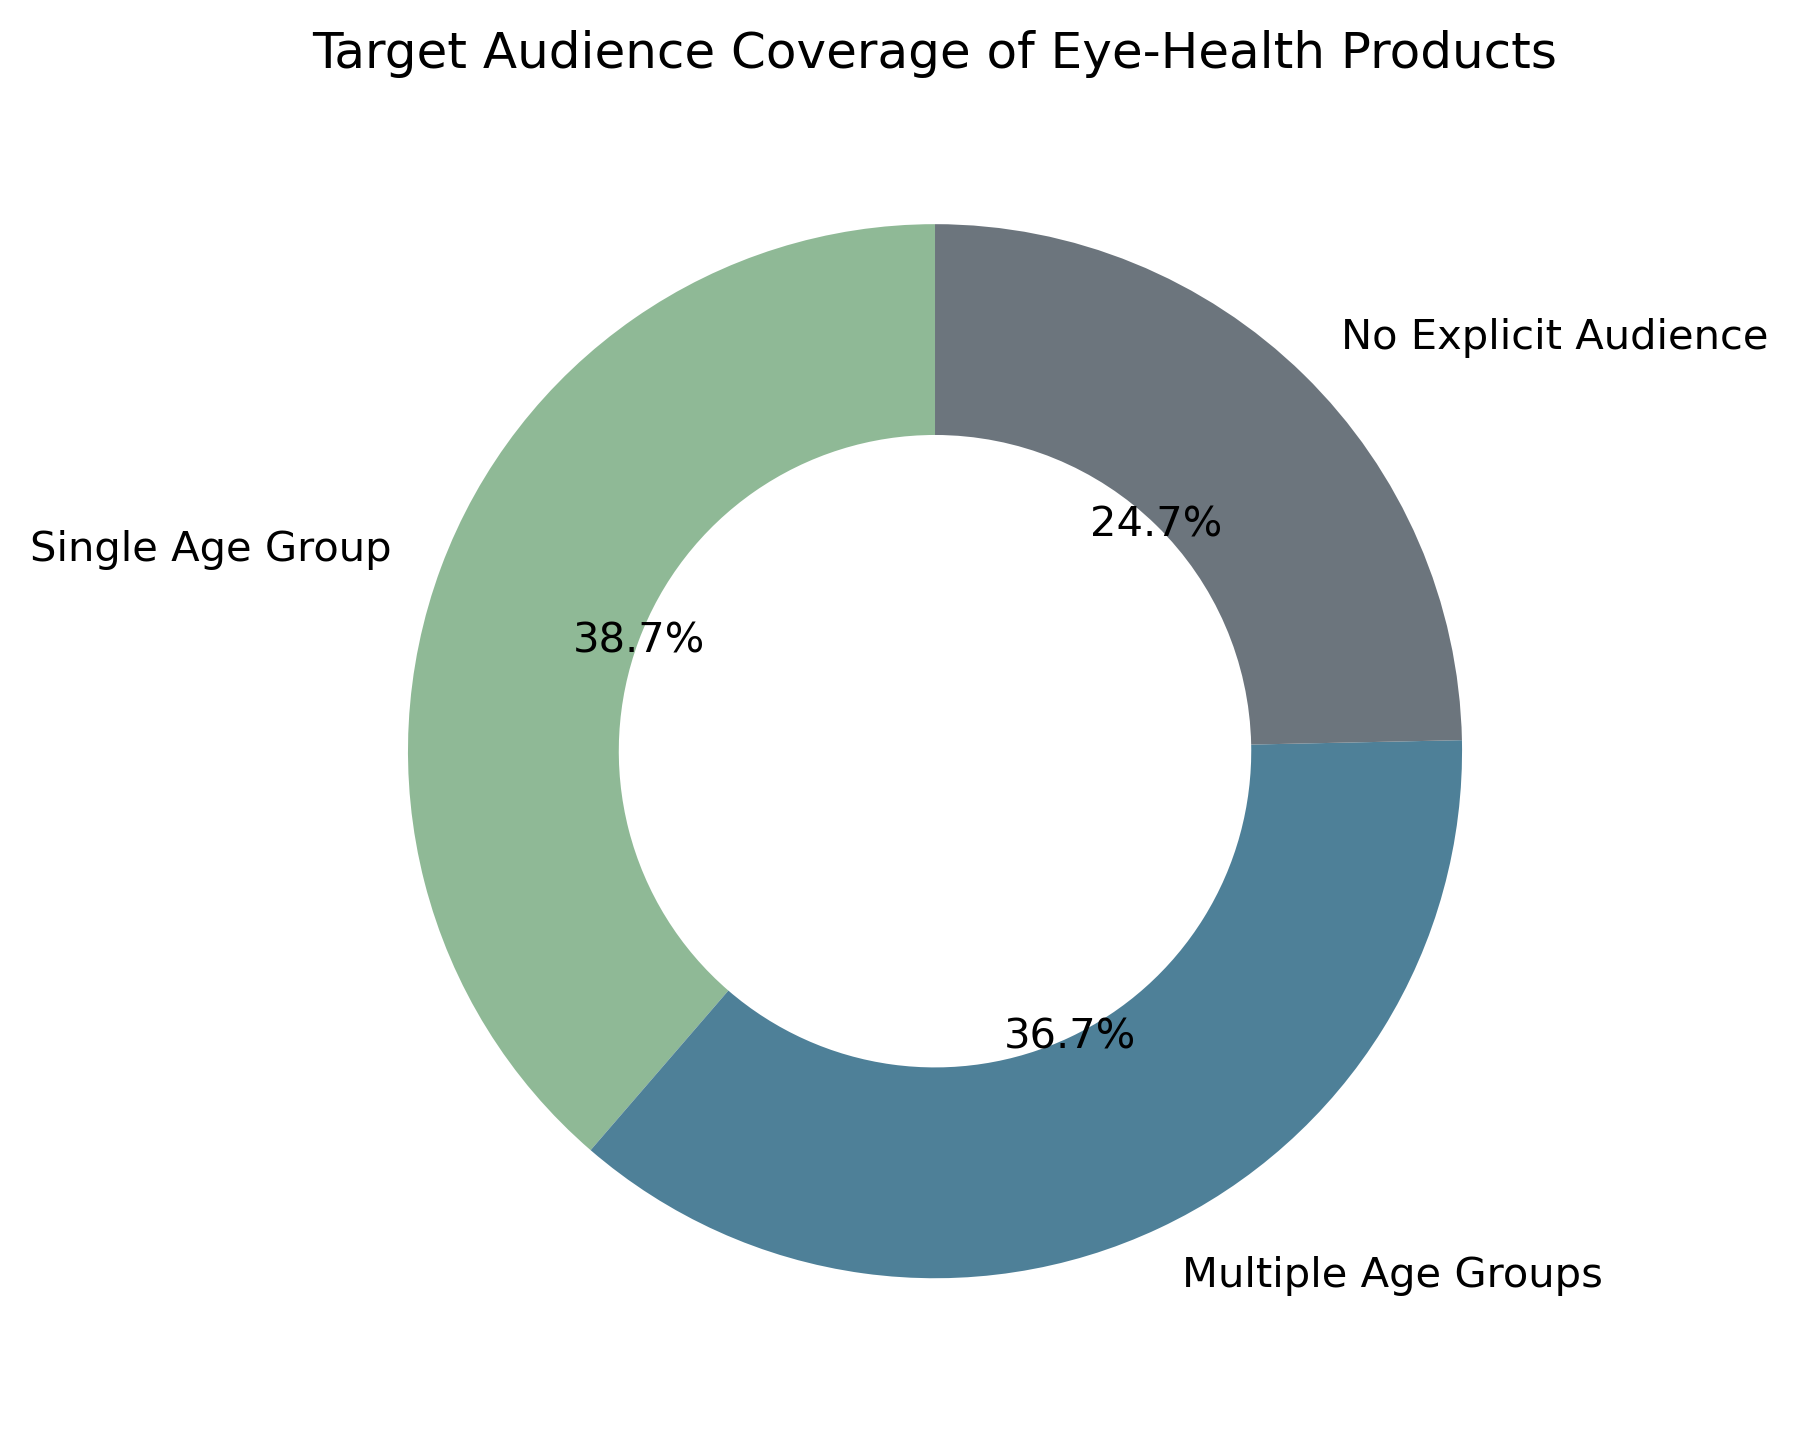

In [22]:
# A substantial proportion of eye-health products either target multiple age groups
# or intentionally avoid specifying a target audience, reflecting a demand-side
# positioning toward universal, cross-age usage.

# Define age group labels
age_groups = {"Child", "Teen", "Adult", "Older Adult"}

def count_age_groups(tag_list):
    if not tag_list or len(tag_list) == 0:
        # Explicitly treated as de-audienced / universal positioning
        return "No Explicit Audience"
    age_count = len(set(tag_list) & age_groups)
    if age_count == 0:
        return "No Explicit Audience"
    elif age_count == 1:
        return "Single Age Group"
    else:
        return "Multiple Age Groups"

# Determine coverage type for each product
coverage_type = df["people_objects_normalized"].apply(count_age_groups)

coverage_counts = coverage_type.value_counts()

# Draw donut chart
plt.figure(figsize=(6, 6), dpi=300)

# colors = ["#6C757D","#4E8098","#8FB996","#D4A373",]

# colors = ["#2F6F95","#4E937A","#CED4DA","#9A8C98","#CED4DA"]
color_palette = [
    "#4E8098",
    "#6C757D",
    "#9A8C98",
]

plt.pie(
    coverage_counts,
    labels=coverage_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Donut-style chart
)

plt.title("Target Audience Coverage of Eye-Health Products")

plt.tight_layout()
save_figure("Target Audience Coverage of Eye-Health Products.png", transparent=True)
plt.show()


In [23]:
def is_eye_health_supplement(title: str) -> bool:
    """
    Determine whether a product belongs to the category of
    eye-health–related nutritional supplements.
    Designed for real Taobao market context (demand-side perspective).
    """

    if not isinstance(title, str):
        return False

    title = title.lower()

    # Hard exclusion: clearly NOT nutritional supplements
    hard_exclude = [
        # Topical products / devices
        "眼霜", "眼膜", "眼贴", "精华液", "次抛",
        "眼罩", "蒸汽", "按摩", "理疗", "仪",
        "台灯", "护眼灯", "学习灯",
        "护理液", "洗眼", "滴眼", "眼药水",
        "bb霜", "粉底", "遮瑕", "素颜霜",
        "otc", "处方", "医疗器械",
    ]

    if any(k in title for k in hard_exclude):
        return False

    # Core eye-health function keywords
    eye_function_keywords = [
        "护眼", "眼睛", "眼健康", "视力",
        "视疲劳", "干眼", "黄斑",
        "飞蚊", "蓝光", "老花"
    ]

    has_eye_function = any(k in title for k in eye_function_keywords)

    # Highly related eye-health ingredients (Taobao context)
    eye_related_ingredients = [
        "叶黄素", "玉米黄质",
        "蓝莓", "越橘", "花青素",
        "dha", "鱼油", "藻油",
        "虾青素"
    ]

    has_eye_ingredient = any(k in title for k in eye_related_ingredients)

    # Exclude products for pets only
    pet_keywords = ["猫", "狗", "宠物"]

    if any(k in title for k in pet_keywords) and not has_eye_function:
        # Pet-related without eye-health function → exclude
        return False

    # Final decision
    return has_eye_function or has_eye_ingredient


In [24]:
df["is_eye_health_supplement"] = df["Detail_Title"].apply(is_eye_health_supplement)

In [25]:
# Calculate the proportion of eye-health supplements in the dataset
ratio = df["is_eye_health_supplement"].mean() * 100
print(f"Eye-health supplement proportion: {ratio:.1f}%")

Eye-health supplement proportion: 98.0%


In [26]:
# Classify products as eye-health supplements or non-eye-health items based on their titles and output all results for inspection
# Apply the eye-health classification function
df["is_eye_health"] = df["Detail_Title"].apply(is_eye_health_supplement)

# Split the dataset into two groups
eye_df = df[df["is_eye_health"] == True]
non_eye_df = df[df["is_eye_health"] == False]

# Basic statistics
total_n = len(df)
eye_n = len(eye_df)
non_eye_n = len(non_eye_df)

print("===================================")
print("📊 Eye-Health Product Classification Summary")
print("===================================")
print(f"Total number of products: {total_n}")
print(f"Eye-health oral supplements: {eye_n}")
print(f"Non-eye-health / excluded products: {non_eye_n}")
print(f"Proportion of eye-health products: {eye_n / total_n * 100:.1f}%")
print("===================================\n")

# Full output to console

print("\n==============================")
print("✅ [All Eye-Health Oral Supplement Titles]")
print("==============================\n")

print(eye_df["Detail_Title"].to_string(index=False))

print("\n==============================")
print("❌ [All Non-Eye-Health / Excluded Product Titles]")
print("==============================\n")

print(non_eye_df["Detail_Title"].to_string(index=False))

# Save full results to files (recommended for manual inspection)

eye_path = "eye_health_products_titles_ALL.txt"
non_eye_path = "non_eye_products_titles_ALL.txt"

with open(eye_path, "w", encoding="utf-8") as f:
    for t in eye_df["Detail_Title"]:
        f.write(str(t) + "\n")

with open(non_eye_path, "w", encoding="utf-8") as f:
    for t in non_eye_df["Detail_Title"]:
        f.write(str(t) + "\n")

print("\n📁 Full result files have been saved:")
print(f" - Eye-health products (all): {eye_path}")
print(f" - Non-eye-health products (all): {non_eye_path}")

📊 Eye-Health Product Classification Summary
Total number of products: 300
Eye-health oral supplements: 294
Non-eye-health / excluded products: 6
Proportion of eye-health products: 98.0%


✅ [All Eye-Health Oral Supplement Titles]

DLOVE【诺奖得主研发】水溶性叶黄素虾青素亮眼护眼猫去泪痕狗GJ DLOVE【诺奖得主研发】...
德国双心高端护眼宝胶囊越橘蓝莓鱼油护眼叶黄素成人护眼丸omega3 德国双心高端护眼宝胶囊越橘...
Youthit优思益蓝莓叶黄素护眼丸成人越橘胶囊花青素进口保健品 Youthit优思益蓝莓叶黄...
Swisse叶黄素成人护眼片保护眼睛保健品官方正品旗舰店蓝莓越橘 Swisse叶黄素成人护眼片...
汤臣倍健Yep花青素亮眼蓝莓叶黄素青少年成人呵护眼睛营养咀嚼片 汤臣倍健Yep花青素亮眼蓝莓叶...
朴诺叶黄素成人护眼中老年专用保健品蓝莓胶囊朴诺官方正品旗舰店 朴诺叶黄素成人护眼中老年专用保健...
叶黄素护眼蓝莓美国进口高浓缩胶囊眼睛保健品成人中老年旗舰店 叶黄素护眼蓝莓美国进口高浓缩胶囊眼...
澳洲Youthit优思益蓝莓叶黄素护眼丸成人胶囊DHA新升级进口2瓶 澳洲Youthit优思益...
朴诺蓝莓素叶黄素成人护眼丸片眼睛保健品官方正品美国进口 朴诺蓝莓素叶黄素成人护眼丸片眼睛保健品...
北京同仁堂朕皇官方正品叶黄素酯蓝莓越橘儿童学生成人中老年软糖 北京同仁堂朕皇官方正品叶黄素酯蓝...
德国双心护眼叶黄素成人护眼丸胶囊45粒正品官方旗舰店 德国双心护眼叶黄素成人护眼丸胶囊45粒正...
游离态叶黄素共晶进口高浓缩叶黄素成人护眼胶囊中老年视力眼疲劳 游离态叶黄素共晶进口高浓缩叶黄素...
Keophial越橘叶黄素胶囊儿童成人护眼睛专用正品官方旗舰店中老年 Keophial越橘叶黄...
仁和蓝莓叶黄素酯软糖片正品官方儿童青少年成人非进口护旗舰店眼 仁和蓝莓叶黄素酯软糖片正品官方儿...
swisse叶黄素成人护眼片蓝莓花青素越橘眼睛保健品官方效期26.11 swisse叶黄素成人...
同仁堂蓝

Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Overall Proportion of Eye-Health Nutrition Products in the Sampled Market.png


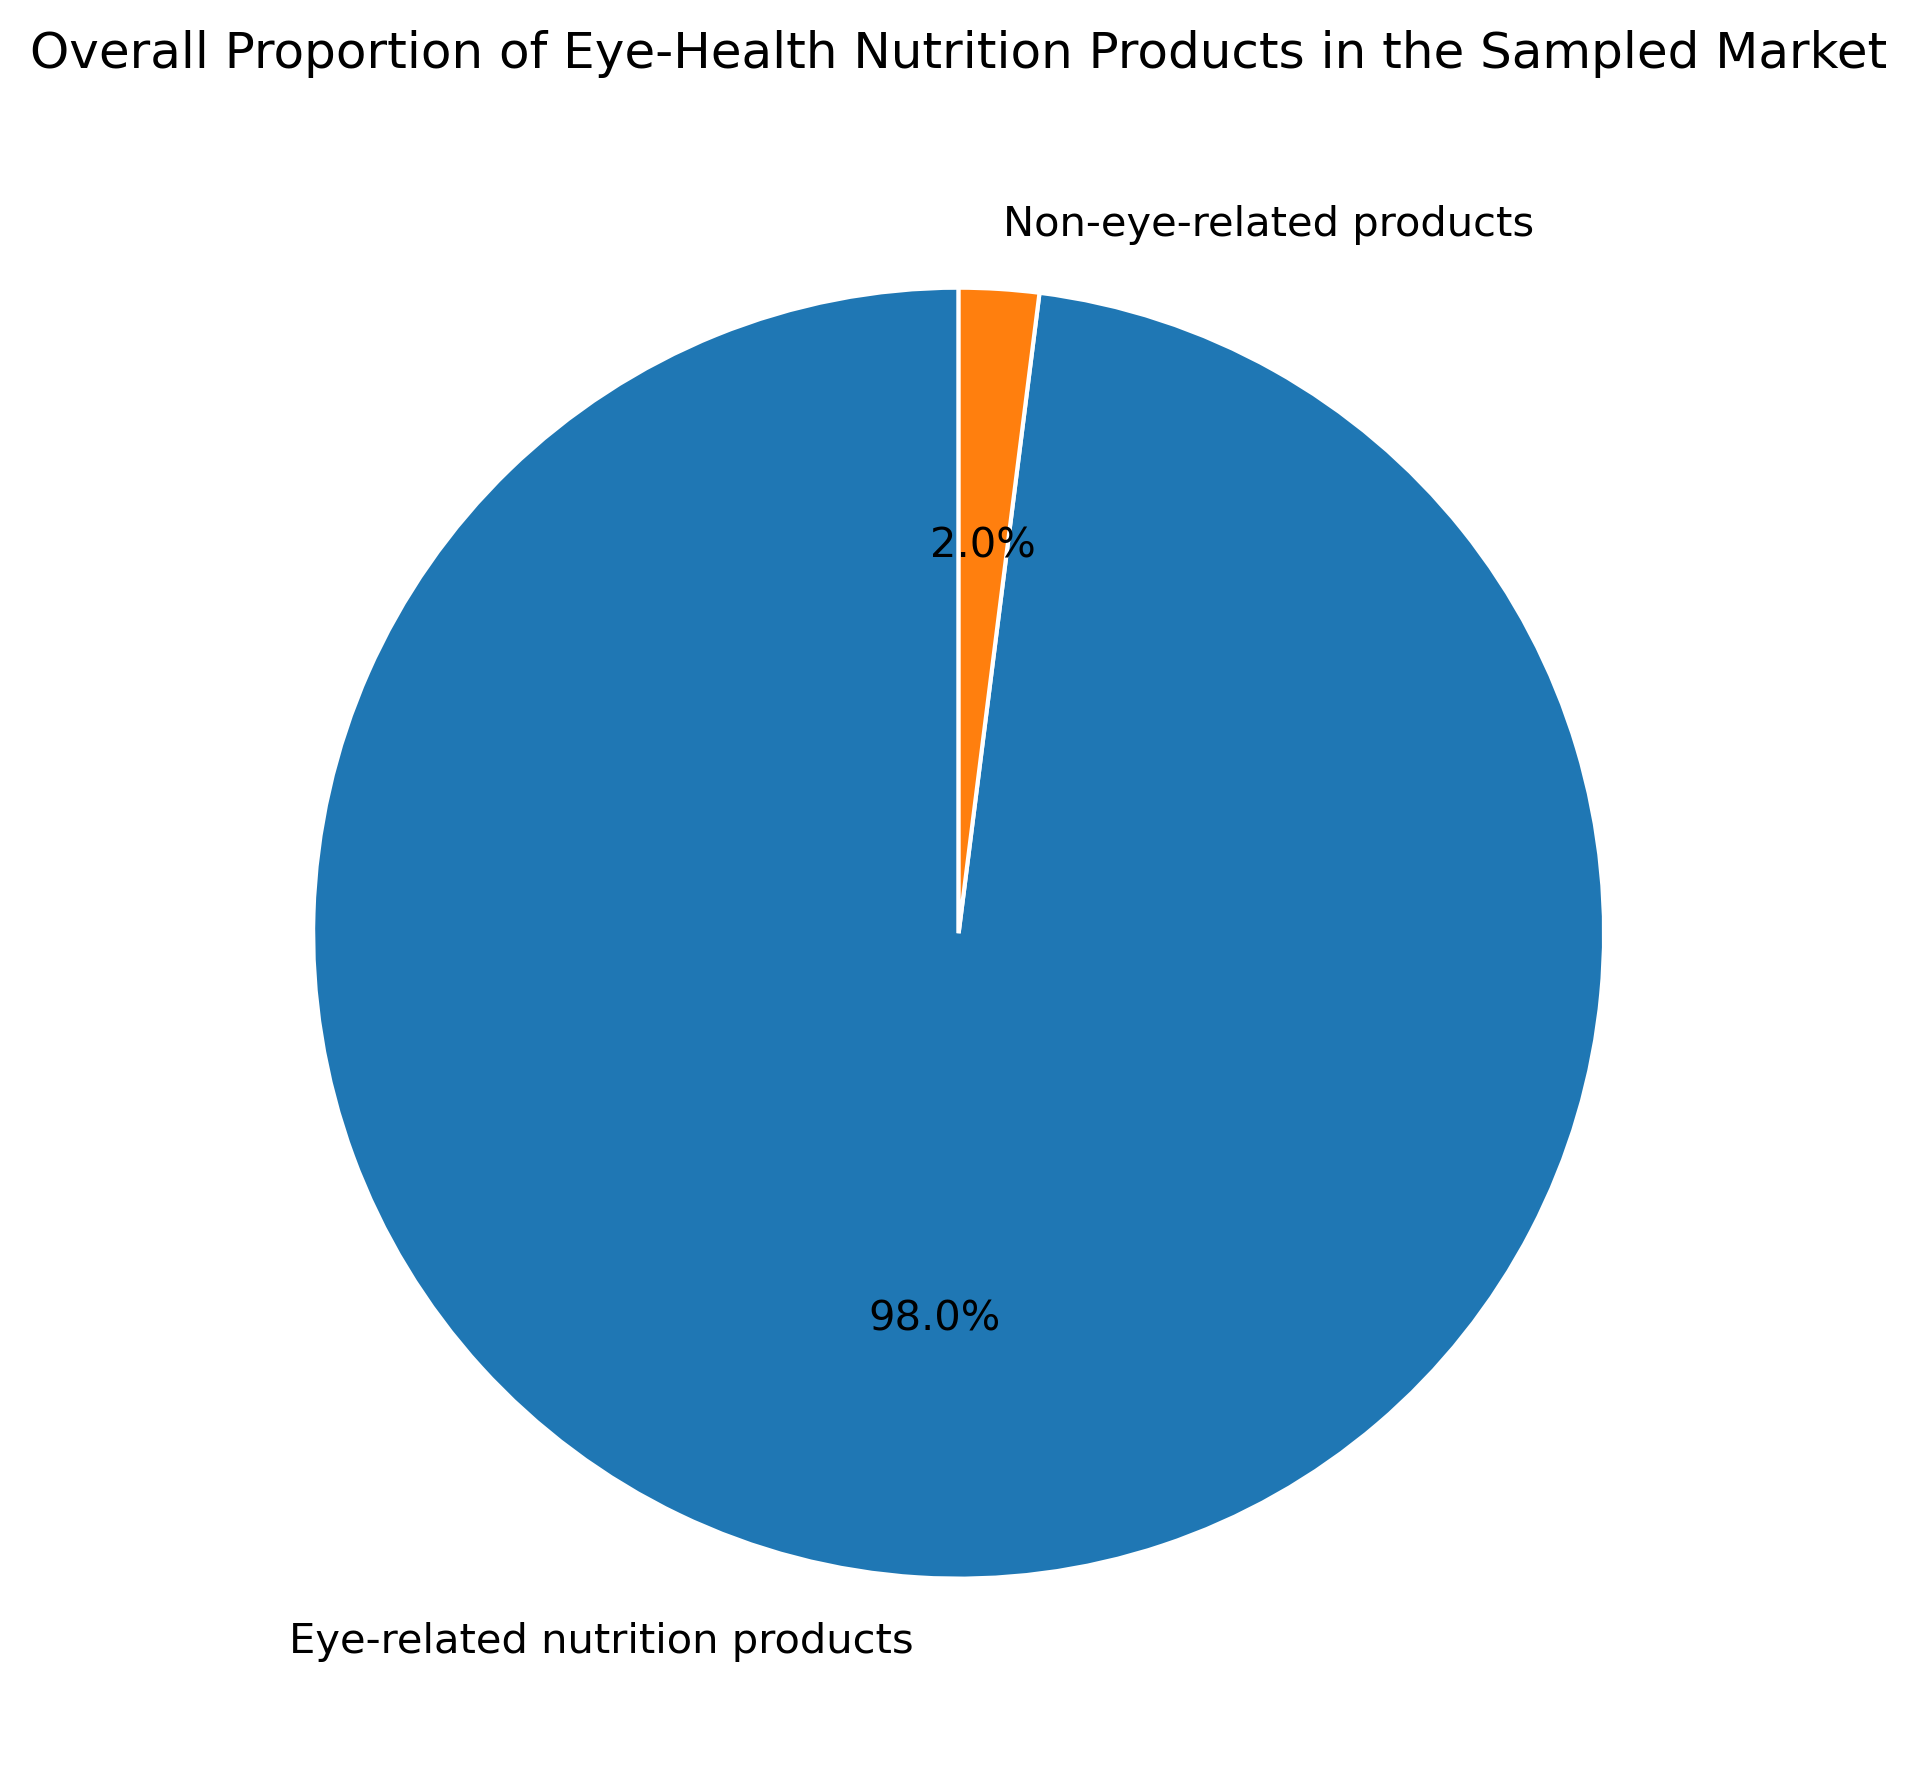

Proportion of eye-related products: 98.0% (294 / 300)


In [27]:
# Count products
counts = df["is_eye_health"].value_counts()

eye_count = counts.get(True, 0)
non_eye_count = counts.get(False, 0)

plot_df = pd.DataFrame({
    "Category": ["Eye-related nutrition products", "Non-eye-related products"],
    "Count": [eye_count, non_eye_count]
})

# Research-style blue & orange color palette
colors = [
    "#1F77B4",  # Blue (eye-related)
    "#FF7F0E",  # Orange (non-eye-related)
]

# Plot pie chart
plt.figure(figsize=(6, 6), dpi=300)

plt.pie(
    plot_df["Count"],
    labels=plot_df["Category"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor="white")
)

# Title
plt.title(
    "Overall Proportion of Eye-Health Nutrition Products in the Sampled Market",
    fontsize=12,
    pad=14
)

plt.tight_layout()
save_figure("Overall Proportion of Eye-Health Nutrition Products in the Sampled Market.png", transparent=True)
plt.show()

print(
    f"Proportion of eye-related products: "
    f"{eye_count / (eye_count + non_eye_count):.1%} "
    f"({eye_count} / {eye_count + non_eye_count})"
)


In [28]:
category_map = {
    "叶黄素": "Lutein",
    "叶黄素 玉米黄质": "Lutein + Zeaxanthin",
    "蓝莓 护眼": "Blueberry-based",
    "虾青素": "Astaxanthin",
    "DHA": "DHA",
    "护眼 保健品": "General Eye-health",
}


In [29]:
eye_df["Category_EN"] = eye_df["Category"].map(category_map)
eye_df = eye_df[eye_df["Category_EN"].notna()]
category_counts = eye_df["Category_EN"].value_counts()

/var/folders/xg/1dxb66bs6vb_zvnfx43l9jx80000gn/T/ipykernel_64210/81227700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_df["Category_EN"] = eye_df["Category"].map(category_map)


Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Product Supply Concentration Across Eye-Health Ingredient Categories.png


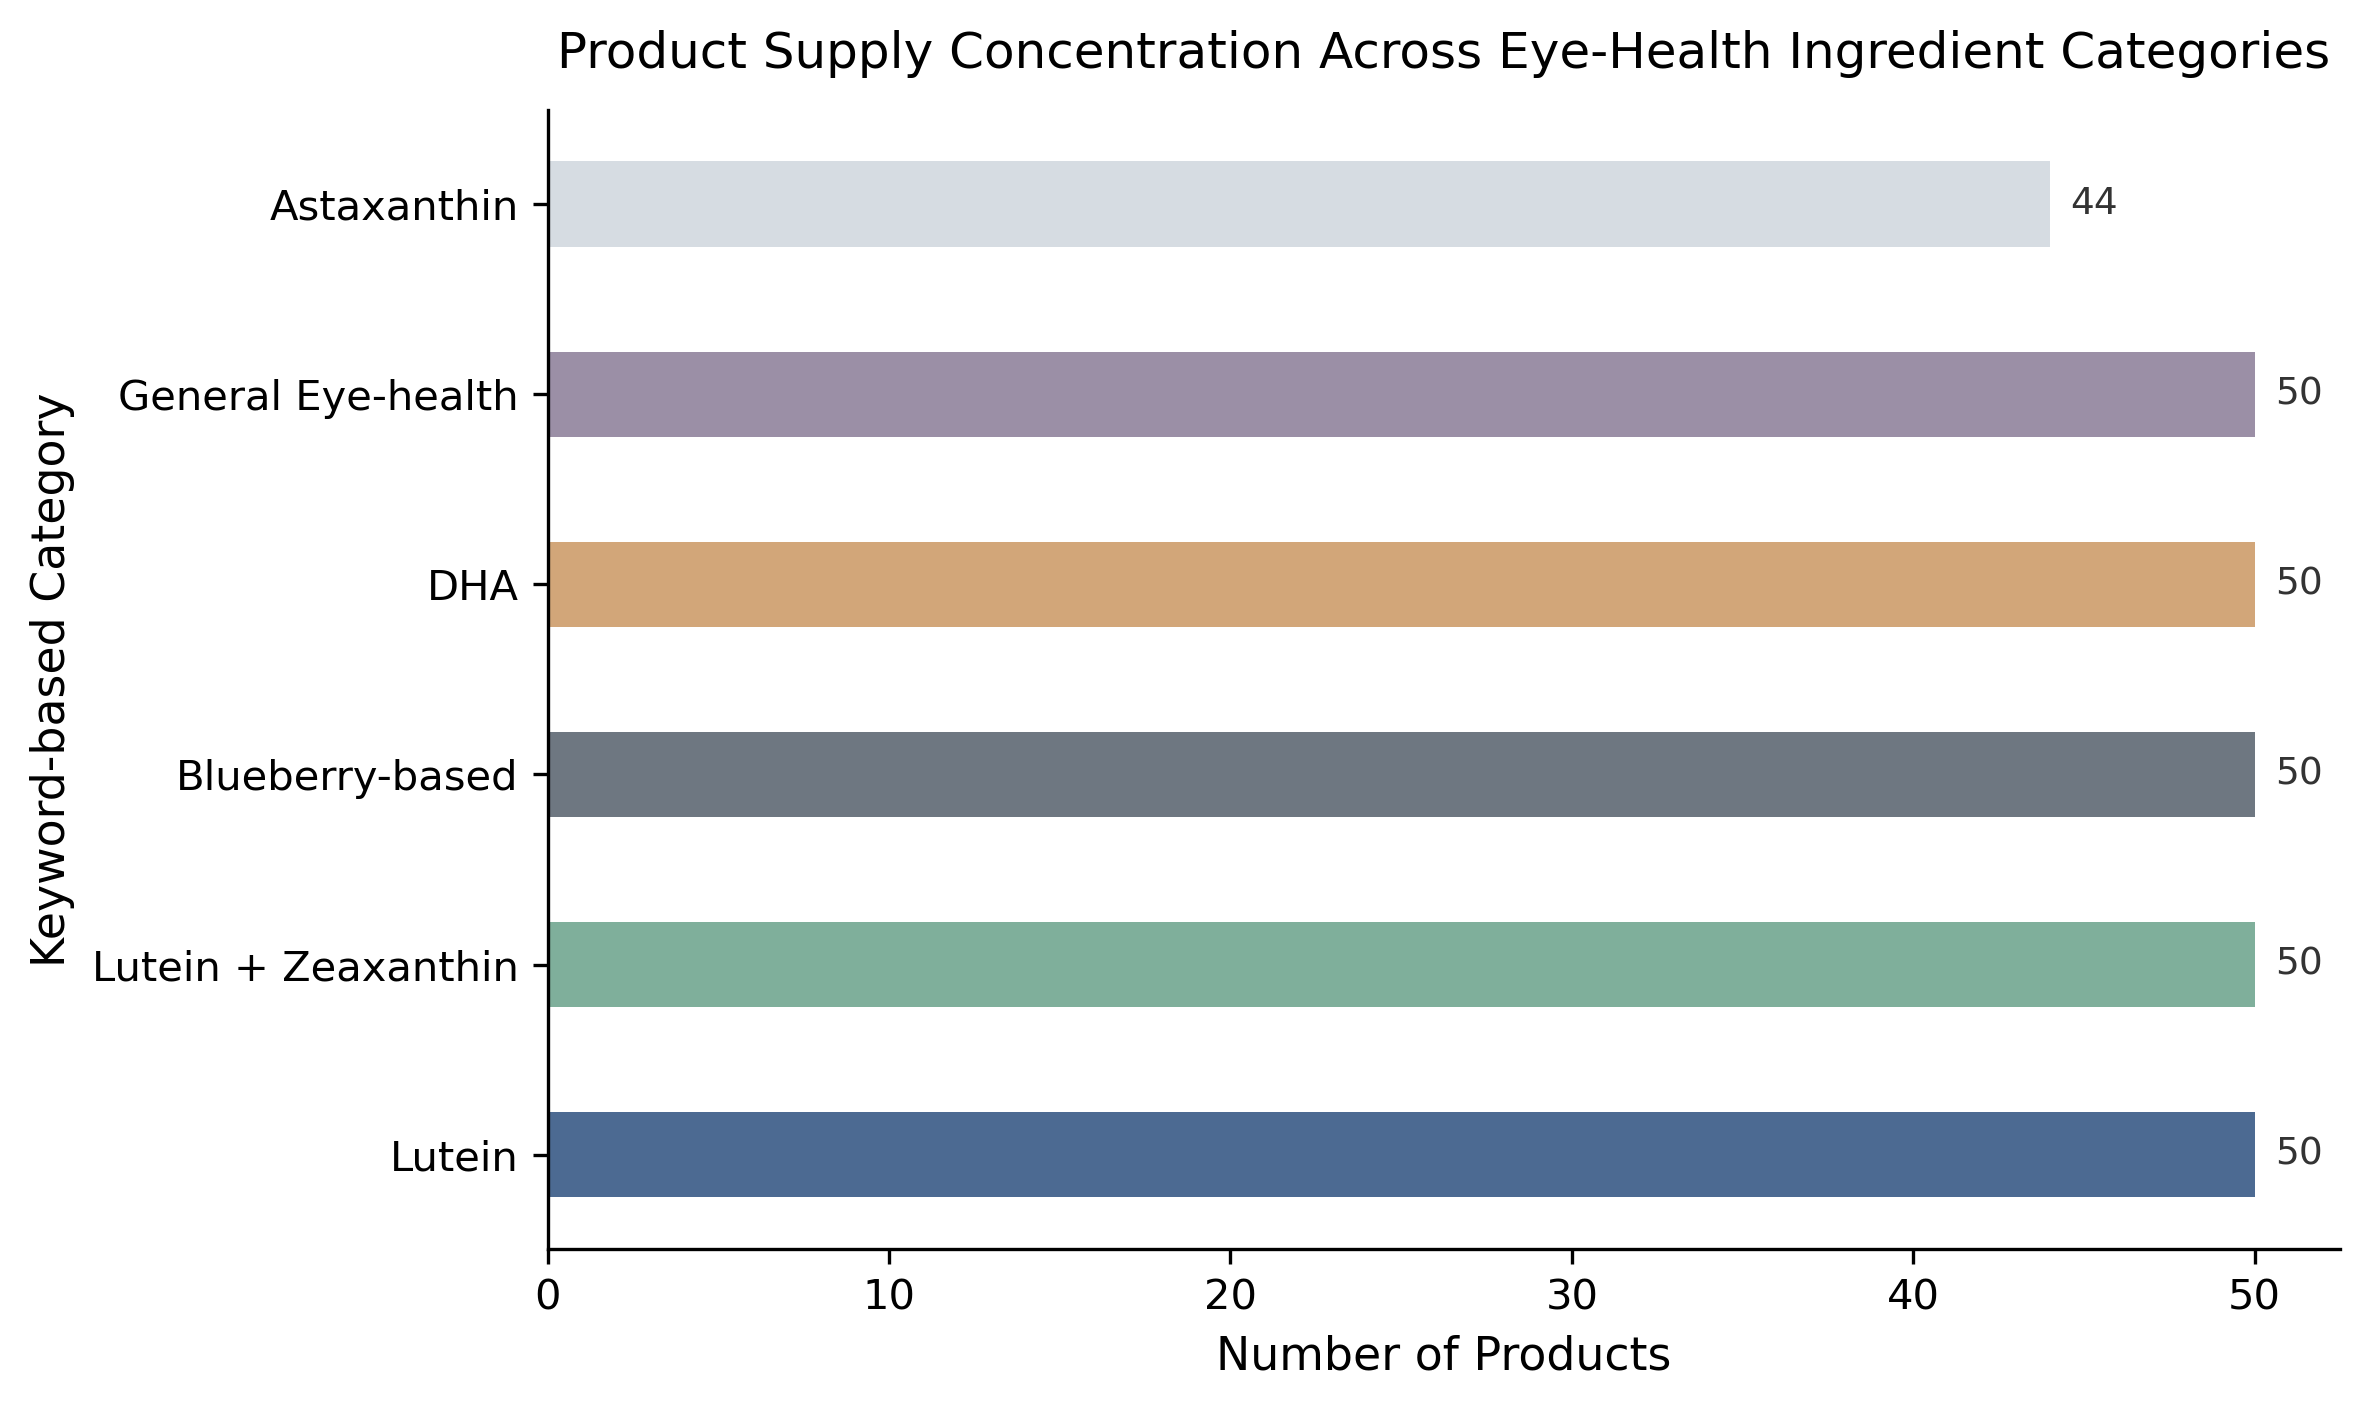

In [30]:
plt.figure(figsize=(8, 4.8), dpi=300)

colors = [
    "#4C6A92",  # muted blue
    "#7FAF9B",  # soft green
    "#6E7781",  # neutral gray
    "#D2A679",  # light amber
    "#9B8FA6",  # soft purple-gray
    "#D6DCE2",  # light gray
]

bars = plt.barh(
    category_counts.index,
    category_counts.values,
    color=colors[:len(category_counts)],
    height=0.45,
)

# Value annotations
for bar in bars:
    w = bar.get_width()
    plt.text(
        w + 0.6,
        bar.get_y() + bar.get_height() / 2,
        f"{int(w)}",
        va="center",
        fontsize=9,
        color="#333333"
    )

# Axes labels and title
plt.xlabel("Number of Products", fontsize=11)
plt.ylabel("Keyword-based Category", fontsize=11)

plt.title(
    "Product Supply Concentration Across Eye-Health Ingredient Categories",
    fontsize=12,
    pad=10
)



# Remove unnecessary borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
save_figure("Product Supply Concentration Across Eye-Health Ingredient Categories.png", transparent=True)
plt.show()

## Market Demand Analysis Based on Sales Distribution: High Sales Volumes of Top Products Indicate Strong Market Demand

In [31]:
eye_df["Sold_Num"].median()
eye_df["Sold_Num"].sort_values(ascending=False).head(10)

13     500000.0
204    400000.0
10     100000.0
38     100000.0
202    100000.0
201    100000.0
279    100000.0
103    100000.0
138    100000.0
115    100000.0
Name: Sold_Num, dtype: float64

Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Distribution of Sales Volume for Eye-health Nutrition Products.png


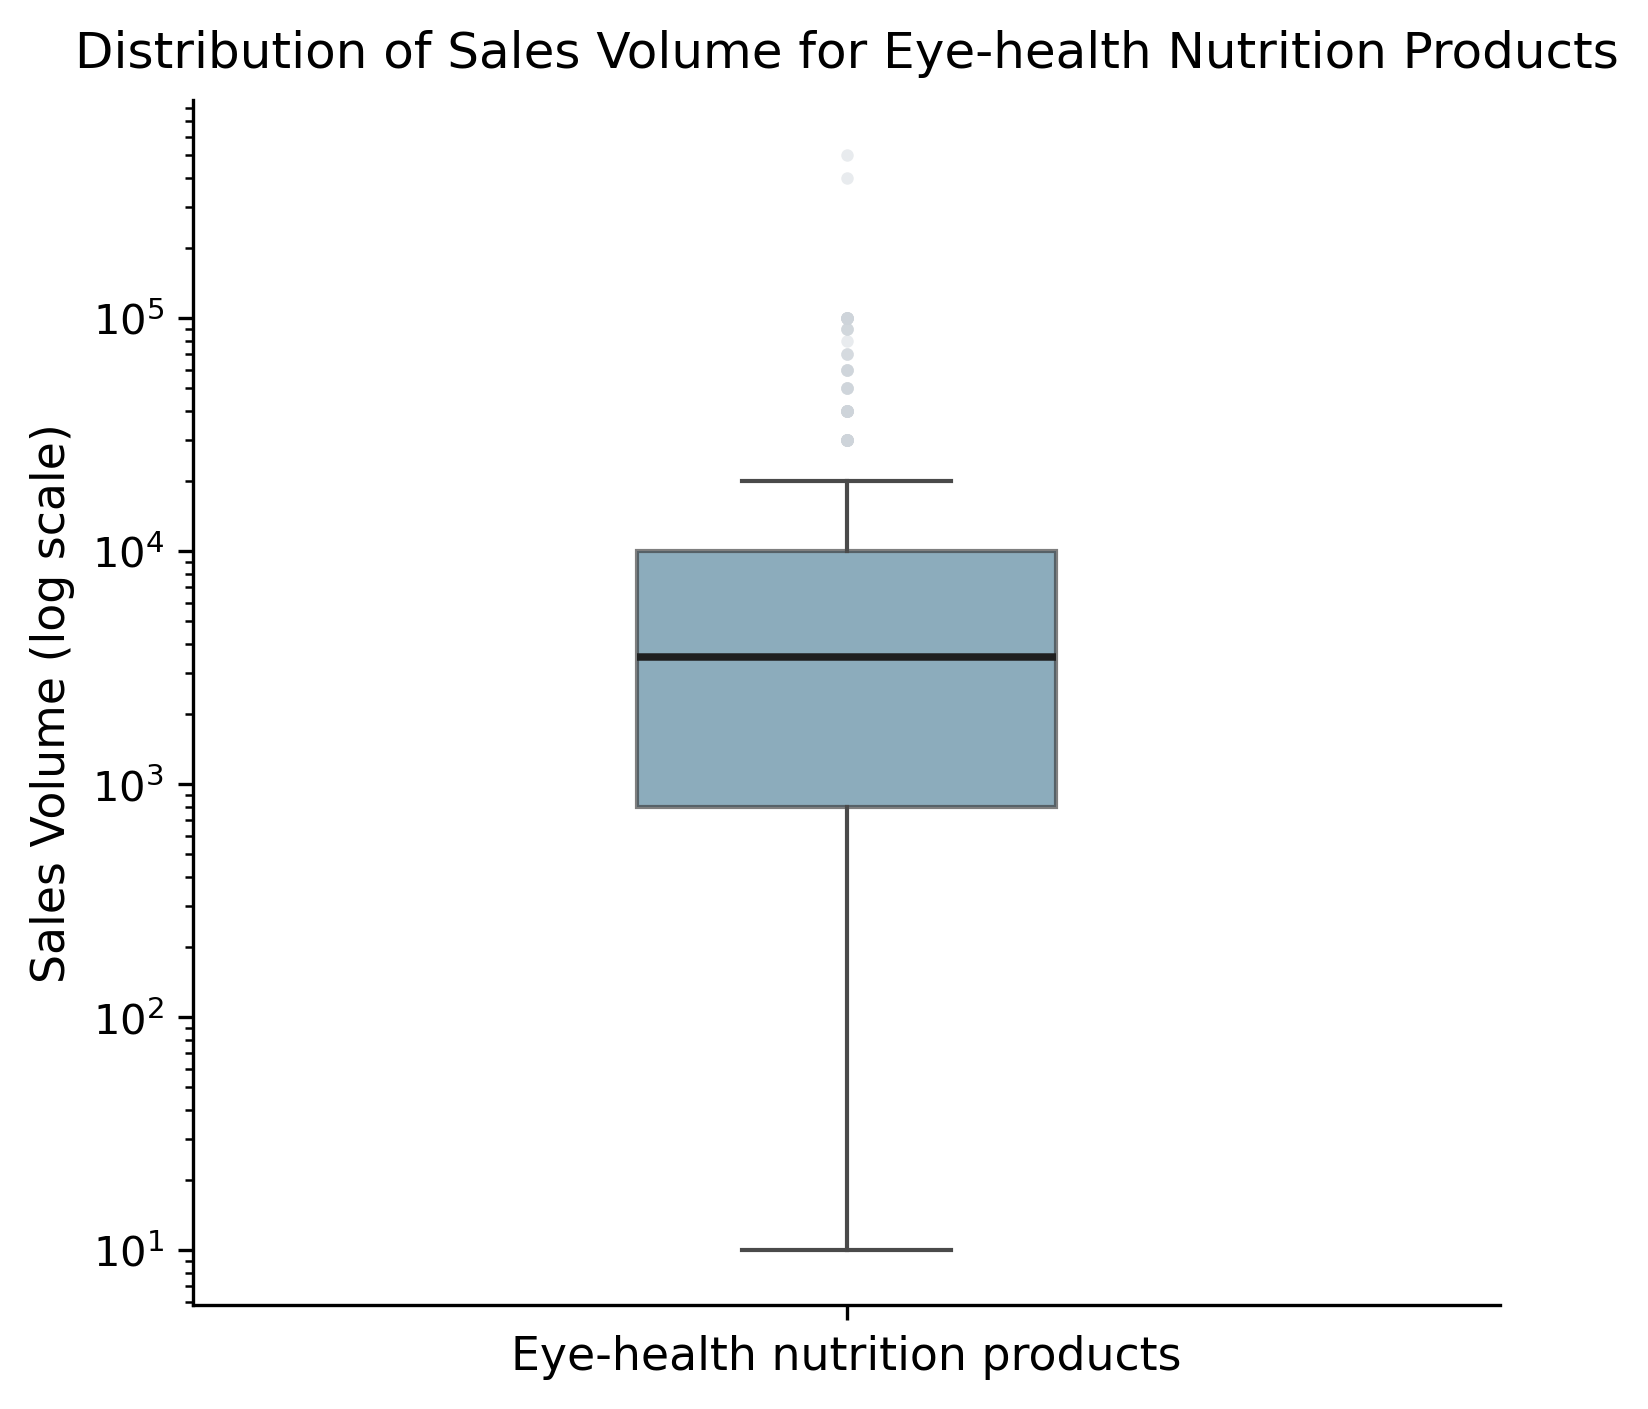

In [32]:
plt.figure(figsize=(5.2, 4.8), dpi=300)

plt.boxplot(
    eye_df["Sold_Num"].dropna(),
    vert=True,
    widths=0.32,  # slimmer box
    patch_artist=True,
    boxprops=dict(
        facecolor="#4E8098",
        alpha=0.65,
        edgecolor="#3A3A3A",
        linewidth=1
    ),
    medianprops=dict(
        color="#1F1F1F",
        linewidth=1.8
    ),
    whiskerprops=dict(
        color="#4A4A4A",
        linewidth=1
    ),
    capprops=dict(
        color="#4A4A4A",
        linewidth=1
    ),
    flierprops=dict(
        marker="o",
        markerfacecolor="#CED4DA",
        markeredgecolor="none",
        markersize=3,
        alpha=0.45
    )
)

plt.yscale("log")

plt.ylabel("Sales Volume (log scale)", fontsize=11)
plt.xticks([1], ["Eye-health nutrition products"], fontsize=11)

plt.title(
    "Distribution of Sales Volume for Eye-health Nutrition Products",
    fontsize=12,
    pad=8
)

# clean spines (academic style)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
save_figure("Distribution of Sales Volume for Eye-health Nutrition Products.png", transparent=True)
plt.show()


Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Correlation Between Monthly Sales Volume and Cumulative Review Count.png


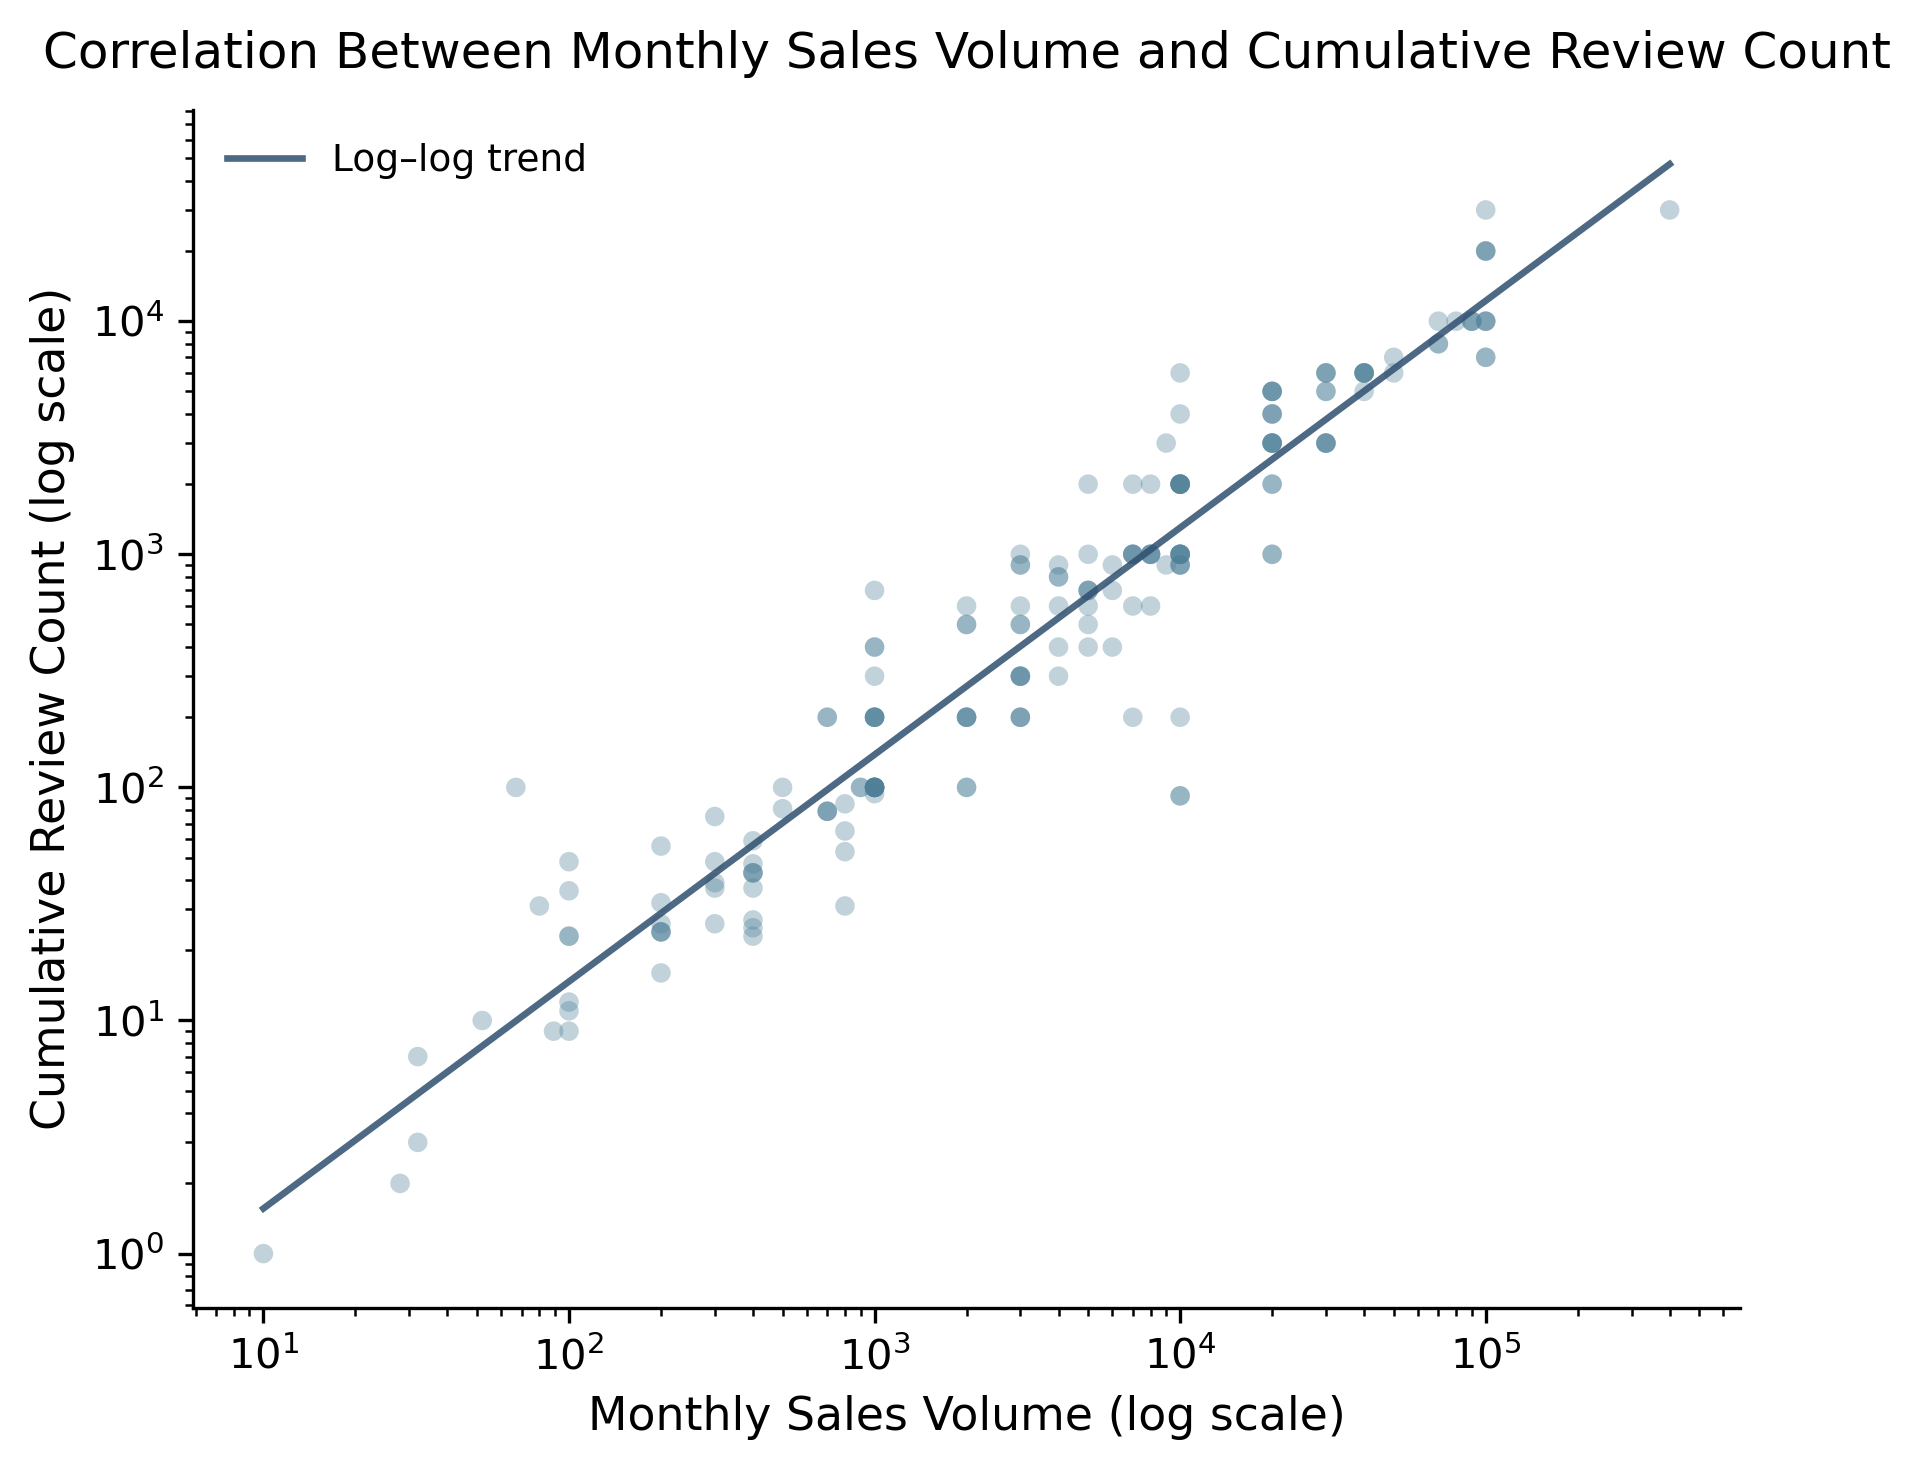

In [33]:
# Prepare data
plot_df = eye_df[["Sold_Num", "Comment_Num"]].dropna()

x = plot_df["Sold_Num"]
y = plot_df["Comment_Num"]

# log-log regression
log_x = np.log10(x)
log_y = np.log10(y)
coef = np.polyfit(log_x, log_y, 1)
poly_fn = np.poly1d(coef)

x_fit = np.linspace(log_x.min(), log_x.max(), 100)
y_fit = poly_fn(x_fit)

plt.figure(figsize=(6, 5), dpi=300)

# Scatter (main information)
plt.scatter(
    x,
    y,
    alpha=0.35,
    s=22,
    color="#4E8098",
    edgecolors="none"
)

# Regression line (auxiliary)
plt.plot(
    10**x_fit,
    10**y_fit,
    color="#2F4F6F",
    linewidth=1.6,
    alpha=0.85,
    label="Log–log trend"
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Monthly Sales Volume (log scale)", fontsize=11)
plt.ylabel("Cumulative Review Count (log scale)", fontsize=11)

plt.title(
    "Correlation Between Monthly Sales Volume and Cumulative Review Count",
    fontsize=12,
    pad=10
)

plt.legend(frameon=False, fontsize=9)

# Clean spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
save_figure("Correlation Between Monthly Sales Volume and Cumulative Review Count.png", transparent=True)
plt.show()


## Market Demand Analysis Based on Sales Distribution: High Sales Volumes of Top Products Reflect Strong Market Demand

Figure saved to: /Users/xiaowei/Desktop/Group Y_7201_final_project/figures/Distribution of Advertising Claim Severity Levels in Eye-health Products.png


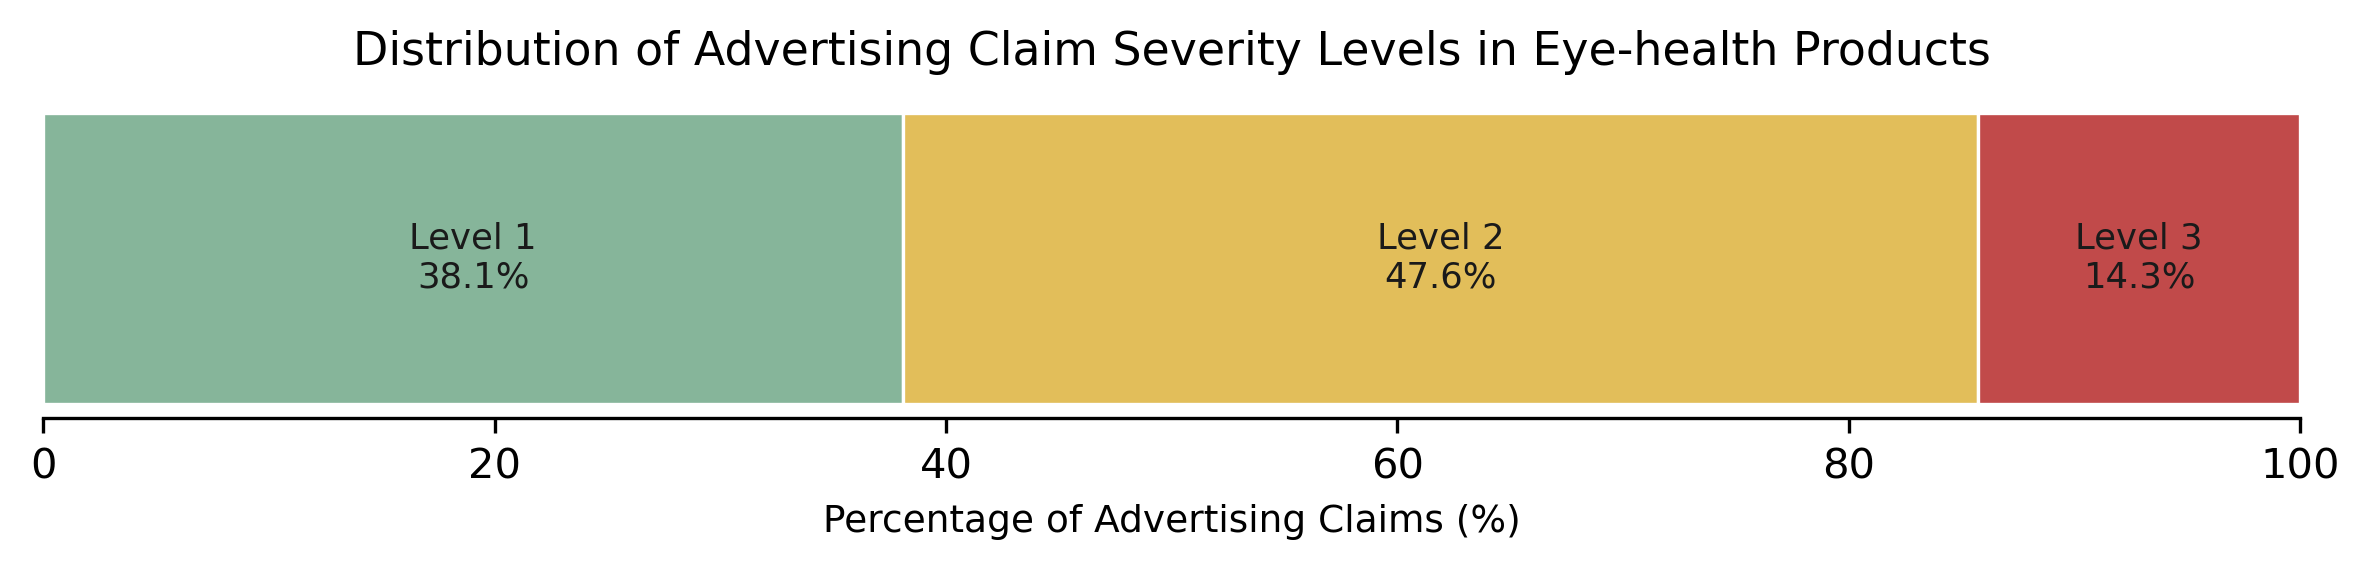

In [34]:
# Severity Distribution of Eye-health Advertising Claims
# Horizontal stacked bar (journal style)

df = pd.read_csv("../../dataset/xiaohongshu_claims_labeled.csv")

level_counts = (
    df["level"]
    .value_counts()
    .reindex([1, 2, 3])
    .fillna(0)
)

level_percent = level_counts / level_counts.sum() * 100

# Slightly darker, journal-friendly palette
colors = {
    1: "#86B59A",  # muted green (Level 1)
    2: "#E2BE5A",  # muted orange-yellow (Level 2)
    3: "#C14A4A",  # muted red (Level 3)
}

fig, ax = plt.subplots(figsize=(8, 2.0), dpi=300)

left = 0
for level in [1, 2, 3]:
    value = level_percent[level]

    ax.barh(
        y=0,
        width=value,
        left=left,
        height=0.38,              # slimmer bar
        color=colors[level],
        edgecolor="white",
        linewidth=0.8
    )

    # In-bar label
    ax.text(
        left + value / 2,
        0,
        f"Level {level}\n{value:.1f}%",
        ha="center",
        va="center",
        fontsize=8.5,
        color="#1A1A1A"
    )

    left += value

# Axes & title
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage of Advertising Claims (%)", fontsize=9)
ax.set_yticks([])
ax.set_ylabel("")

ax.set_title(
    "Distribution of Advertising Claim Severity Levels in Eye-health Products",
    fontsize=11,
    pad=8
)

# Clean spines
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
save_figure("Distribution of Advertising Claim Severity Levels in Eye-health Products.png", transparent=True)
plt.show()


## Survey Data Processing, Analysis, and Visualization

In [35]:
df = pd.read_csv("../../eye_health_awareness_survey.csv")
df.shape


FileNotFoundError: [Errno 2] No such file or directory: '../../eye_health_awareness_survey.csv'

In [ ]:
df.head()

In [ ]:
for col in df.columns:
    print(f"[{col}]")

In [ ]:
df_clean = df.rename(columns={
    "1.你在买护眼产品前会查阅科学文献(如 PubMed、指南)吗?": "check_scientific_evidence",
    "2.你主要通过什么方式了解护眼产品功效?": "info_source",
    "3. 你认为护眼产品能改善视力或延缓近视吗?": "belief_effectiveness",
    "4.你是否担心广告宣传有夸大嫌疑?": "ad_skepticism",
    "5.你是否愿意花时间查阅真正的医学证据?": "willingness_to_check",
    "为什么不愿意花时间查阅真正的医学证据?": "reason_not_checking",
    "6.你是否需要一个“自动识别广告语真实性\"的工具?": "need_verification_tool",
    "7.您的年龄是": "age_group",
    "8.您的性别是": "gender"
})

In [ ]:
df_clean.columns

In [ ]:
info_sources = {
    "TV_Advertising": "电视广告宣传",
    "Social_Media": "小红书/抖音等平台种草",
    "Ecommerce_Reviews": "网购评论",
    "Friends_Family": "亲友推荐",
    "Professionals": "专业人士建议",
    "Scientific_Evidence": "学术资料或医学指南"
}

df_info = df_clean.copy()

for col, keyword in info_sources.items():
    df_info[col] = df_info["info_source"].astype(str).str.contains(keyword)

info_usage_pct = (
    df_info[list(info_sources.keys())]
    .mean()
    .sort_values(ascending=False) * 100
)


In [ ]:
# Sort values from low to high
info_usage_pct = info_usage_pct.sort_values()

plt.figure(figsize=(7, 4.2), dpi=300)

# Draw "sticks" (thin horizontal lines)
plt.hlines(
    y=info_usage_pct.index,
    xmin=0,
    xmax=info_usage_pct.values,
    color="#C7CED6",
    linewidth=2
)

# Draw "lollipops" (dots)
plt.scatter(
    info_usage_pct.values,
    info_usage_pct.index,
    s=70,
    color="#4E8098",
    zorder=3
)

# Percentage annotations
for y, x in zip(info_usage_pct.index, info_usage_pct.values):
    plt.text(
        x + 1.2,
        y,
        f"{x:.1f}%",
        va="center",
        fontsize=9,
        color="#2F2F2F"
    )

# Reference line at 50%
plt.axvline(
    50,
    linestyle="--",
    color="#D0D0D0",
    linewidth=0.8,
    alpha=0.7
)

plt.xlabel("Percentage of Respondents (%)", fontsize=10)
plt.title(
    "Sources of Information Used by Consumers When Evaluating Eye-health Products",
    fontsize=11,
    pad=10
)

plt.xlim(0, 100)

# Minimal, paper-style axes
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis="y", length=0, pad=6)

plt.tight_layout()
save_figure("Sources of Information Used by Consumers When Evaluating Eye-health Products.png", transparent=True)
plt.show()


In [ ]:
ad_map = {
    "经常": "High concern",
    "有一点": "Moderate concern",
    "从未考虑过": "No concern"
}

tool_map = {
    "是": "Yes",
    "否": "No"
}

df_clean["ad_skepticism_en"] = df_clean["ad_skepticism"].map(ad_map)
df_clean["tool_need_en"] = df_clean["need_verification_tool"].map(tool_map)


In [ ]:
cross = (
    pd.crosstab(
        df_clean["ad_skepticism_en"],
        df_clean["tool_need_en"],
        normalize="index"
    ) * 100
)

skepticism_order = ["No concern", "Moderate concern", "High concern"]
tool_order = ["Yes", "No"]
cross = cross.reindex(index=skepticism_order, columns=tool_order)

x = np.arange(len(cross))
bar_width = 0.58

colors = {
    "Yes": "#5B7FA6",
    "No": "#D1D5DB"
}

fig, ax = plt.subplots(figsize=(6.8, 4.2), dpi=300)

bottom = np.zeros(len(cross))

for tool in tool_order:
    values = cross[tool].values
    ax.bar(
        x,
        values,
        width=bar_width,
        bottom=bottom,
        color=colors[tool],
        edgecolor="white",
        linewidth=0.8,
        label=tool
    )
    bottom += values

ax.set_xticks(x)
ax.set_xticklabels(["Low", "Medium", "High"], fontsize=10)
ax.set_xlim(-0.5, len(x) - 0.5)

ax.set_xlabel(
    "Advertising Skepticism Level",
    fontsize=10,
    labelpad=5
)

ax.set_ylim(0, 100)

ax.set_title(
    "Demand for Claim Verification Tools Across Levels of Advertising Skepticism",
    fontsize=11,
    pad=10
)

ax.legend(
    title="Need for Verification Tool",
    frameon=False,
    fontsize=9,
    title_fontsize=9,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1])
save_figure("Demand for Claim Verification Tools Across Levels of Advertising Skepticism.png", transparent=True)
plt.show()
